In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [214]:
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from time import sleep

plt.rcParams.update({
  'font.size': 15, 
  'figure.figsize' : [25, 13],
  'lines.linewidth' : 2,
  })


In [215]:
titles=['size', 'time', 'operations']

### Считывание и функции для отрисовки

In [216]:
arrayNums = ['300', '4100']
arrayNamesFast = ['Counting', 'Heap', 'Merge', 'Radix', 'Shell', 'ShellCiur']
arrayNamesSlow = ['Bubble', 'BubbleIv1', 'BubbleIv2', 'Insertion', 'InsertionBinary', 'Quick', 'Selection']

mapTypeInfo = {'desc' : 'Descending', 'hard' : 'Hard Random', 'medm' : 'Medium Random', 'near' : 'Almost sorted'}

In [217]:
mapSortsFast = {}

map300 = {}
map4100 = {}

mapSortsFast['300'] = map300
mapSortsFast['4100'] = map4100

map300['desc'] = []
map300['hard'] = []
map300['medm'] = []
map300['near'] = []

map4100['desc'] = []
map4100['hard'] = []
map4100['medm'] = []
map4100['near'] = []

# -------------------------------- #

mapSortsSlow = {}

map300Slow = {}
map4100Slow = {}

mapSortsSlow['300'] = map300Slow
mapSortsSlow['4100'] = map4100Slow

map300Slow['desc'] = []
map300Slow['hard'] = []
map300Slow['medm'] = []
map300Slow['near'] = []

map4100Slow['desc'] = []
map4100Slow['hard'] = []
map4100Slow['medm'] = []
map4100Slow['near'] = []


for num in arrayNums:
  for type in mapTypeInfo.keys():
    for name in arrayNamesFast:
      mapSortsFast[num][type].append(pd.read_csv(f'tests/size{num}/{(name).lower()}_{type}_{num}.csv', sep=';'))
    for name in arrayNamesSlow:
      mapSortsSlow[num][type].append(pd.read_csv(f'tests/size{num}/{(name).lower()}_{type}_{num}.csv', sep=';'))
      
display(mapSortsFast['300']['desc'][0])
display(mapSortsSlow['300']['desc'][0])

size  time  operations
0    50  1212        3589
1   100  2374        7189
2   150  4162       10789
3   200  4410       14389
4   250  5434       17989
5   300  6810       21589

size    time  operations
0    50   13158       28421
1   100   55070      114346
2   150  115750      257771
3   200  205120      458696
4   250  319152      717121
5   300  458930     1033046

### Все сортировки

In [218]:
def plotAllSortsTestsFast(numStart : str, numEnd : str, type : str):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  fig.suptitle(f'All Fast Sorts on {mapTypeInfo[type]} array from {numStart} to {numEnd}')
  
  i = 0
  param = 'time'
  for item in mapSortsFast[numEnd][type]:
    item.plot(ax=axs[0], x='size', y=param, xlabel='size', ylabel='nanosec', title=f'All Fast Sorts by {param}: {mapTypeInfo[type]} array from {numStart} to {numEnd}', label=arrayNamesFast[i])
    i += 1
  axs[0].legend()

  i = 0
  param = 'operations'
  for item in mapSortsFast[numEnd][type]:
    item.plot(ax=axs[1], x='size', y=param, xlabel='size', ylabel='operations', title=f'All Fast Sorts by {param}: {mapTypeInfo[type]} array from {numStart} to {numEnd}', label=arrayNamesFast[i])
    i += 1
  axs[1].legend()
  plt.show()

In [219]:
def plotAllSortsTestsSlow(numStart : str, numEnd : str, type : str):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  fig.suptitle(f'All Slow Sorts on {mapTypeInfo[type]} array from {numStart} to {numEnd}')

  i = 0
  param = 'time'
  for item in mapSortsSlow[numEnd][type]:
    item.plot(ax=axs[0], x='size', y=param, xlabel='size', ylabel='nanosec', title=f'All Slow sorts by {param}: array from {numStart} to {numEnd}', label=arrayNamesSlow[i])
    i += 1
  axs[0].legend()

  i = 0
  param = 'operations'
  for item in mapSortsSlow[numEnd][type]:
    item.plot(ax=axs[1], x='size', y=param, xlabel='size', ylabel='operations', title=f'All Slow sorts by {param}: array from {numStart} to {numEnd}', label=arrayNamesSlow[i])
    i += 1
  axs[1].legend()
  plt.show()

##### Medium Random

Slow Sorts | 50 - 300 | Medium Random


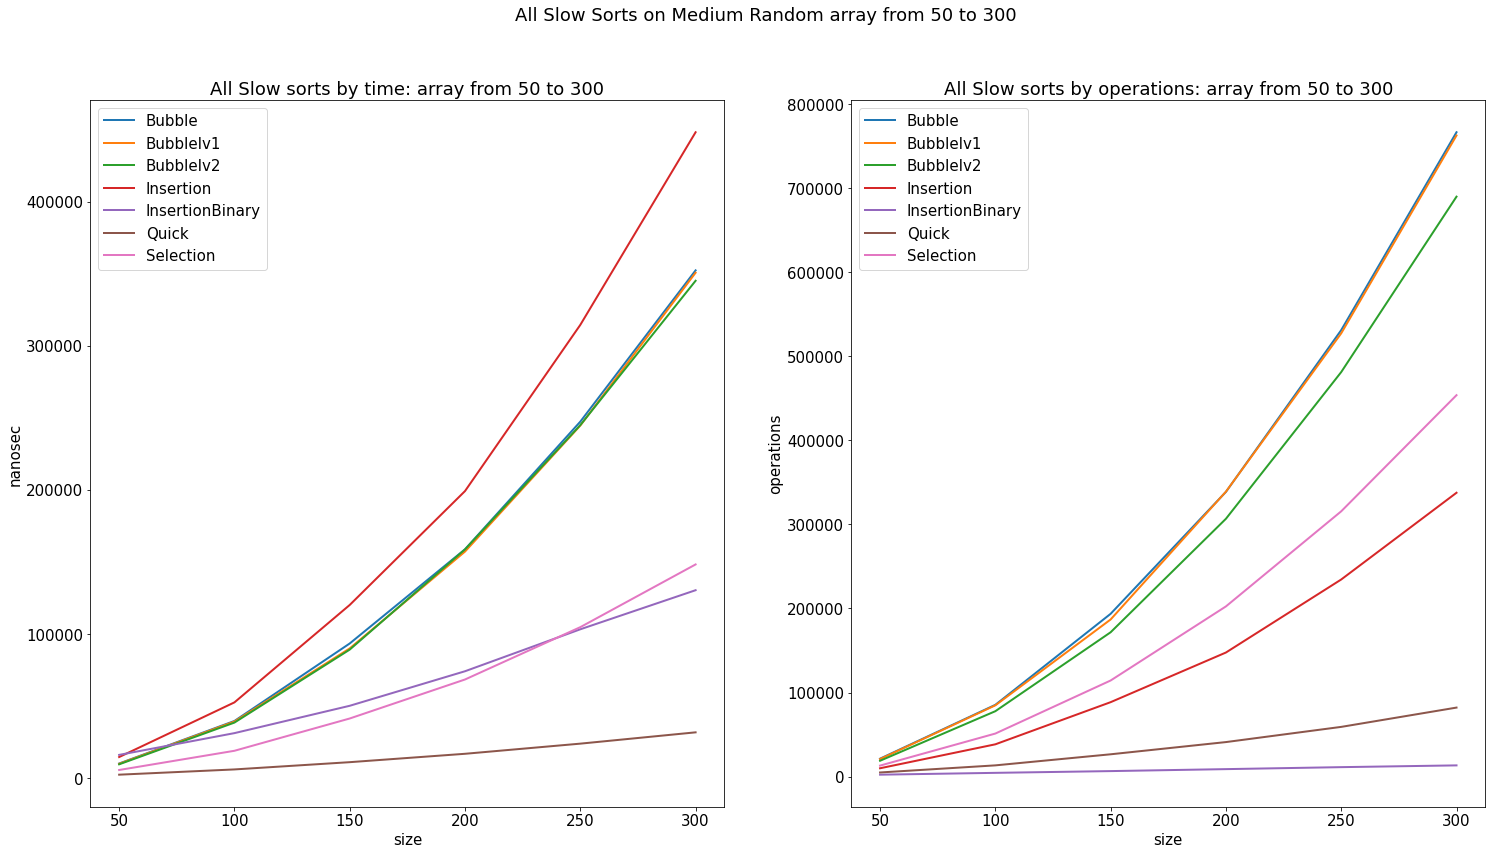

In [220]:
print('Slow Sorts | 50 - 300 | Medium Random')
plotAllSortsTestsSlow('50','300', 'medm')

Fast Sorts | 50 - 300 | Medium Random


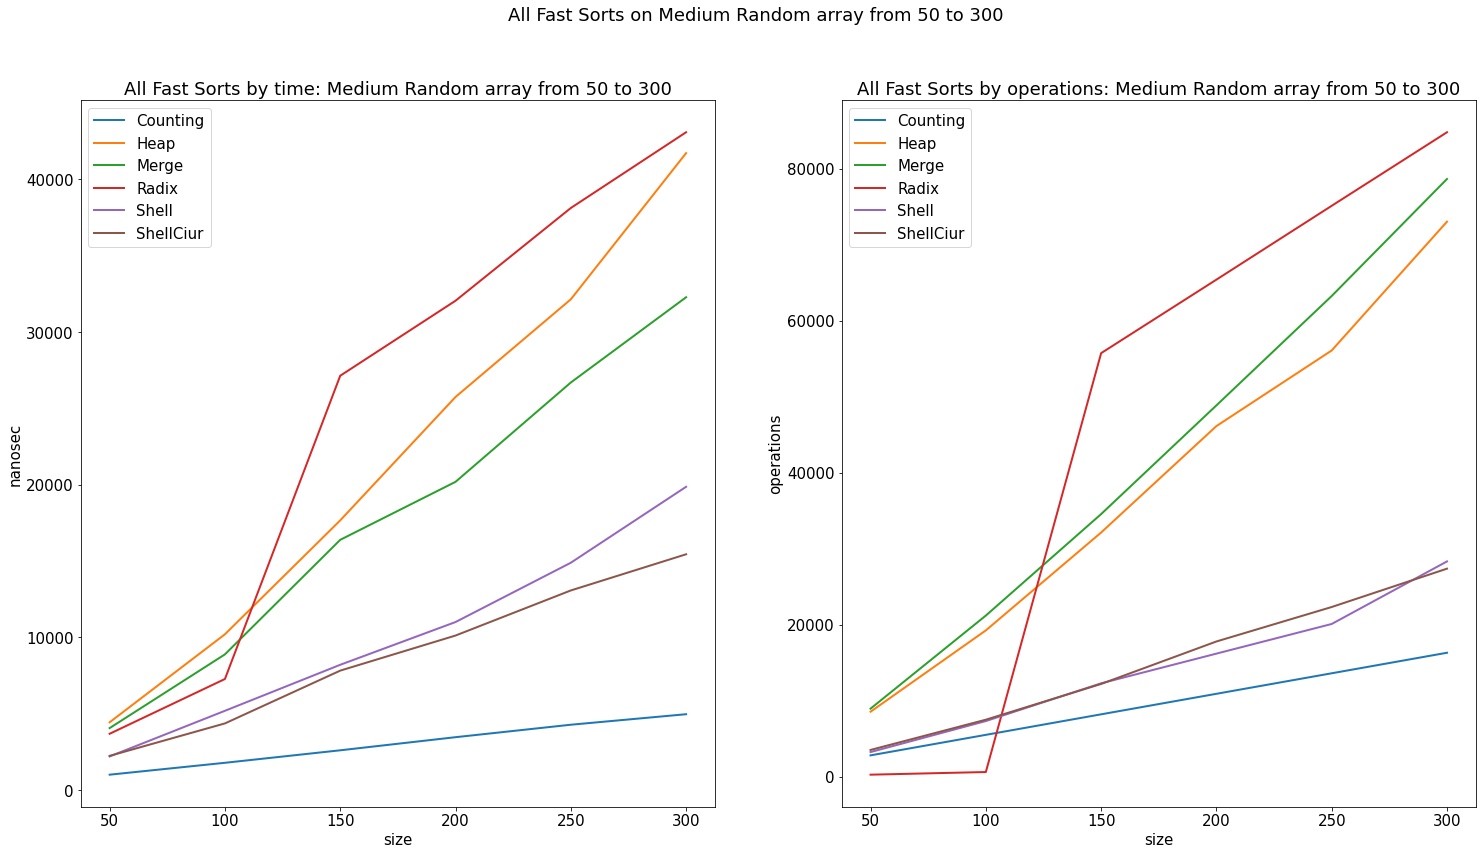

In [221]:
print('Fast Sorts | 50 - 300 | Medium Random')
plotAllSortsTestsFast('50','300', 'medm')

Лучше всех на размерах 50 - 300 с Маленькой генерацией является Counting <br>
Хуже всех на размерах 50 - 300 с Маленькой генерацией является Insertion <br>
По операциям аналогично

Slow Sorts | 100 - 4100 | Medium Random


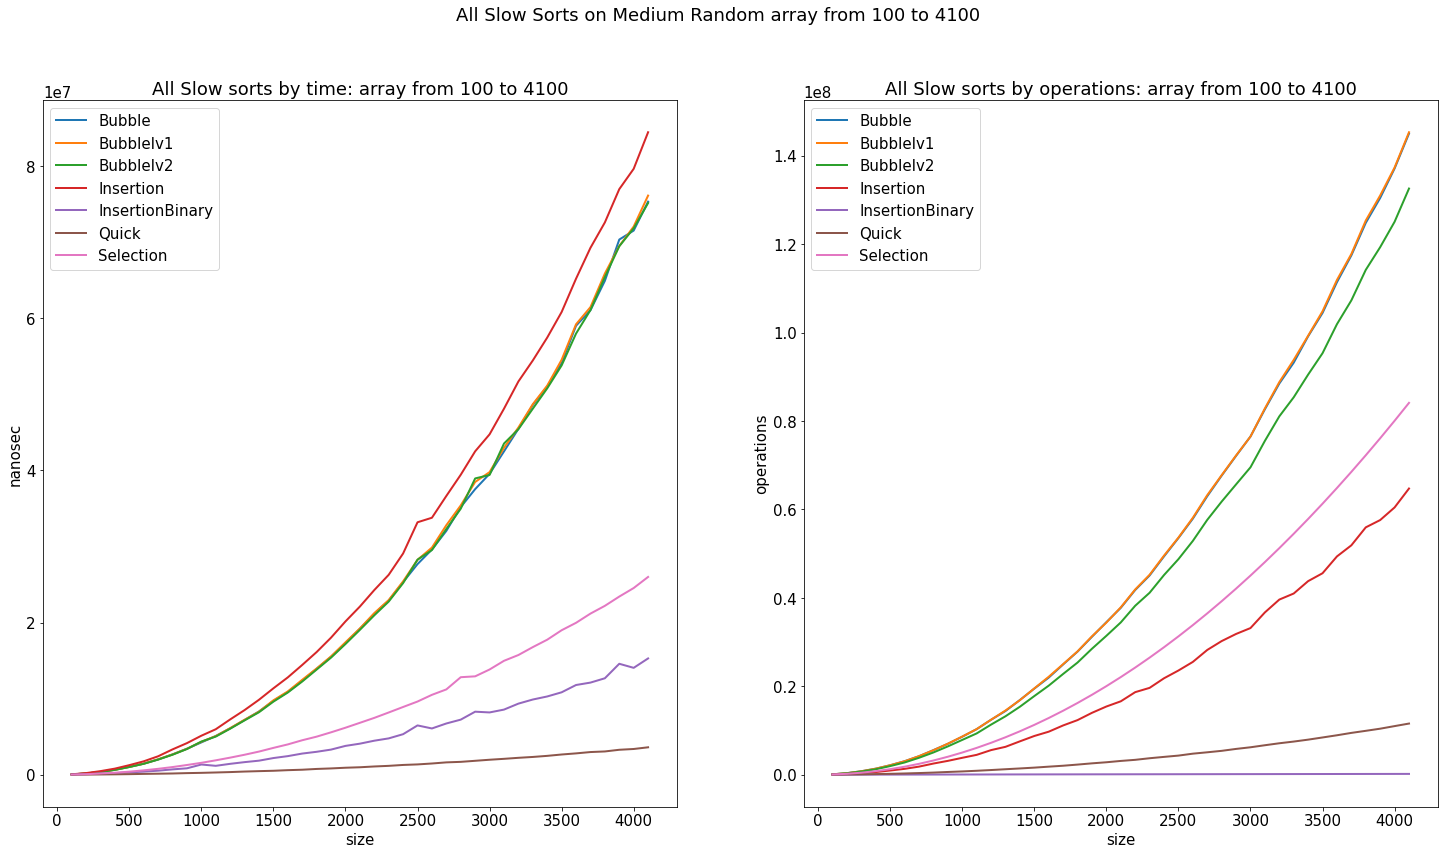

In [222]:
print('Slow Sorts | 100 - 4100 | Medium Random')
plotAllSortsTestsSlow('100','4100', 'medm')

Fast Sorts | 100 - 4100 | Medium Random


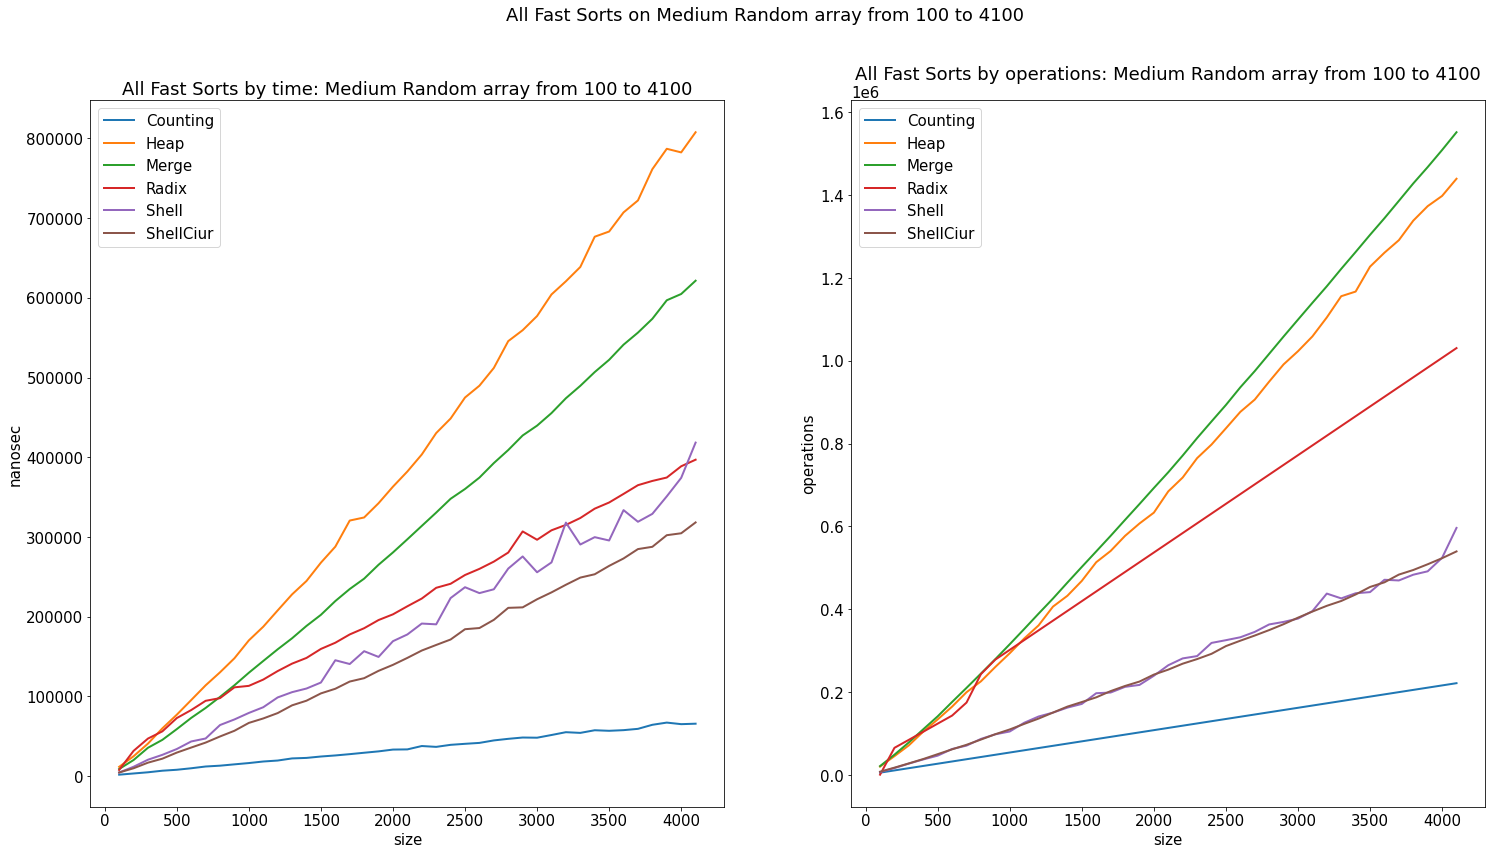

In [223]:
print('Fast Sorts | 100 - 4100 | Medium Random')
plotAllSortsTestsFast('100','4100', 'medm')

Лучше всех на размерах 100 - 4100 с Маленькой генерацией является Counting <br>
Хуже всех на размерах 100 - 4100 с Маленькой генерацией является Insertion <br>
По операциям аналогично

##### Hard Random

Slow Sorts | 50 - 300 | Hard Random


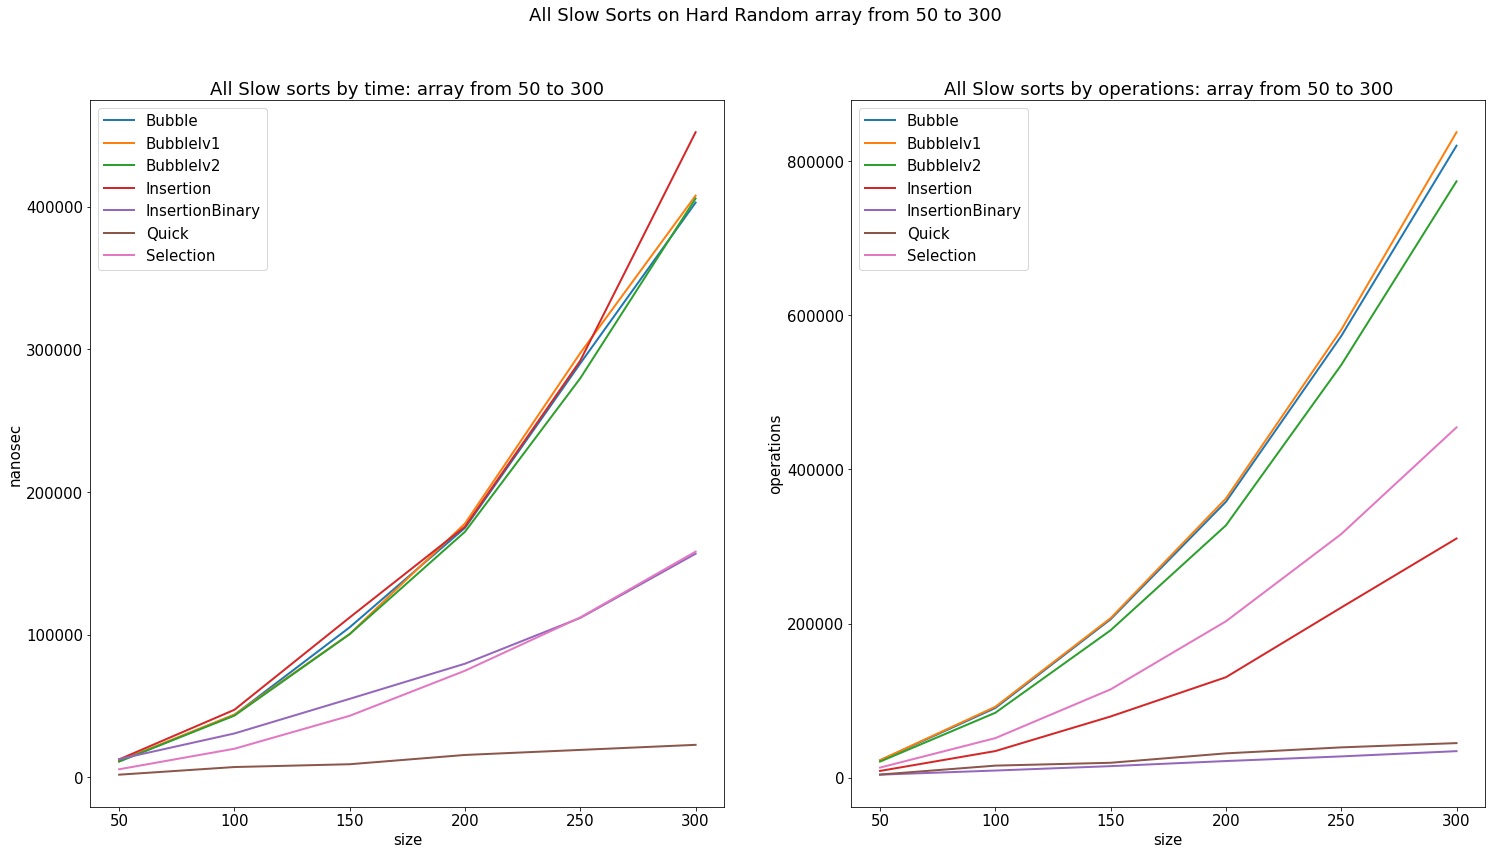

In [224]:
print('Slow Sorts | 50 - 300 | Hard Random')
plotAllSortsTestsSlow('50','300', 'hard')

Fast Sorts | 50 - 300 | Hard Random


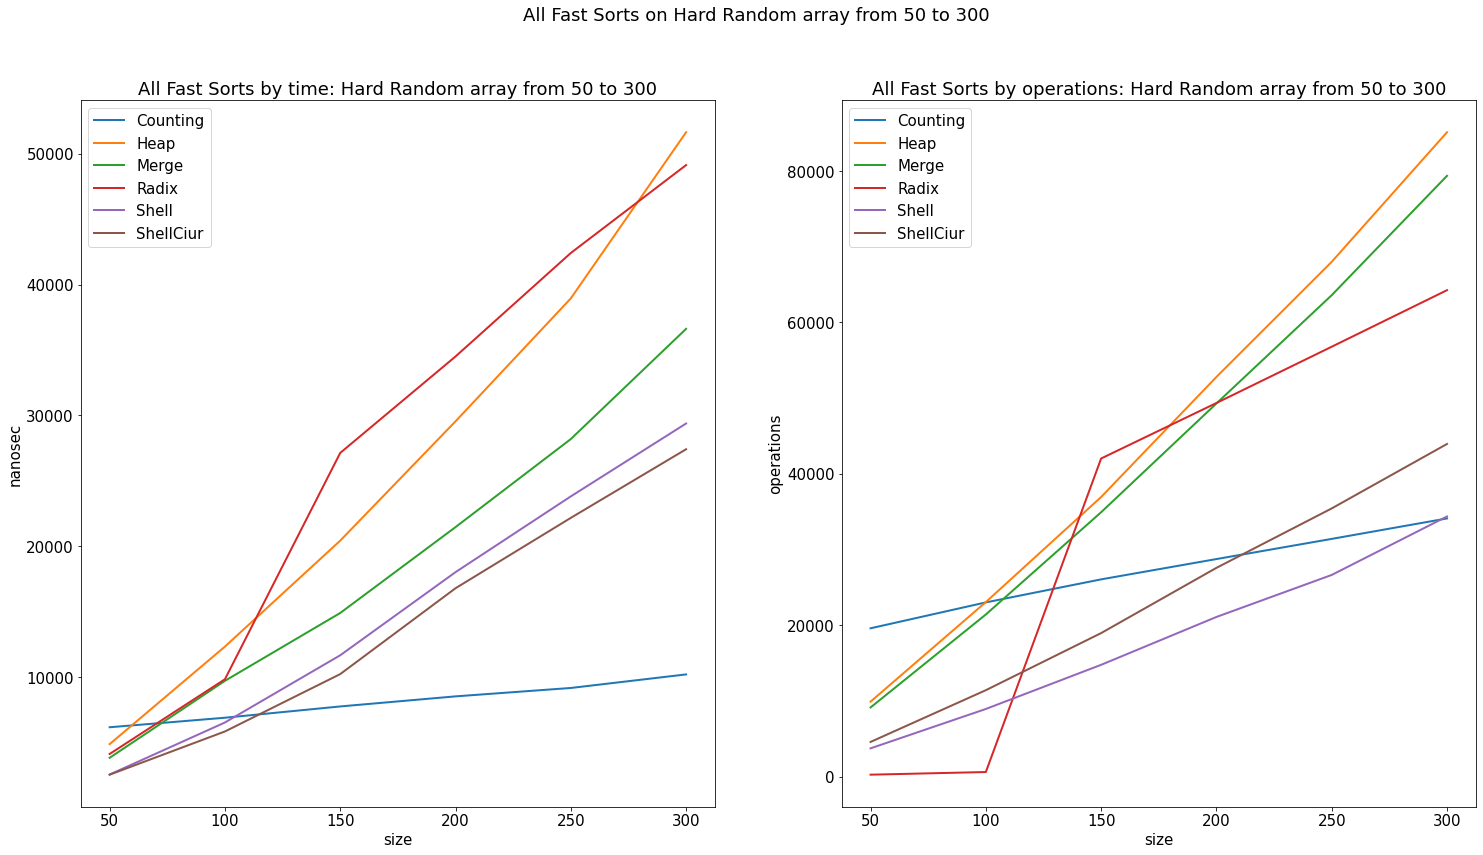

In [225]:
print('Fast Sorts | 50 - 300 | Hard Random')
plotAllSortsTestsFast('50','300', 'hard')

Лучше всех на размерах 50 - 300 с Большой генерацией является Counting <br>
Хуже всех на размерах 50 - 300 с Большой генерацией является Insertion (тяжело определить) <br>
По операциям аналогично

Slow Sorts | 100 - 4100 | Hard Random


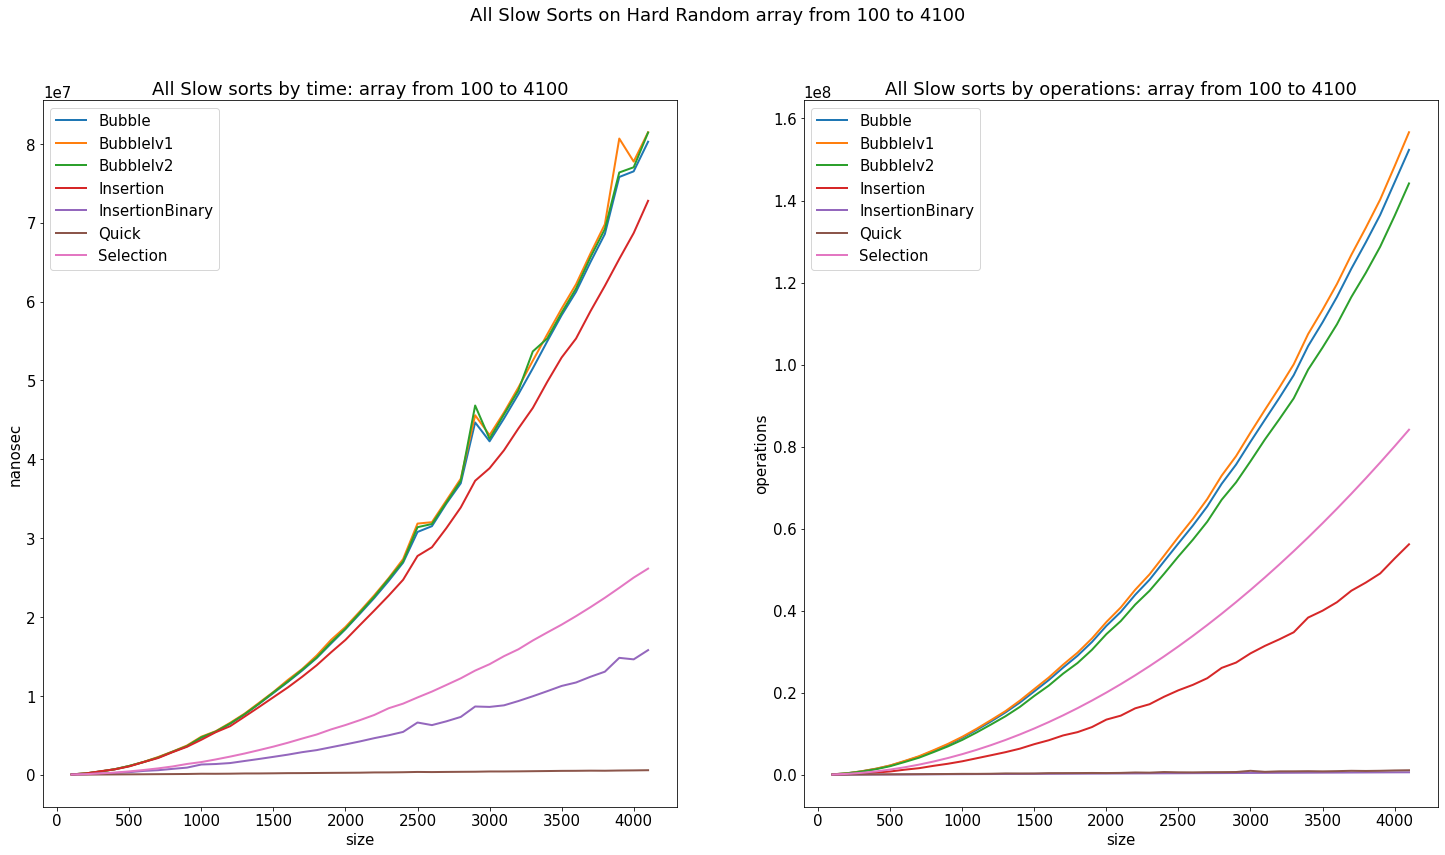

In [226]:
print('Slow Sorts | 100 - 4100 | Hard Random')
plotAllSortsTestsSlow('100','4100', 'hard')

Fast Sorts | 100 - 4100 | Hard Random


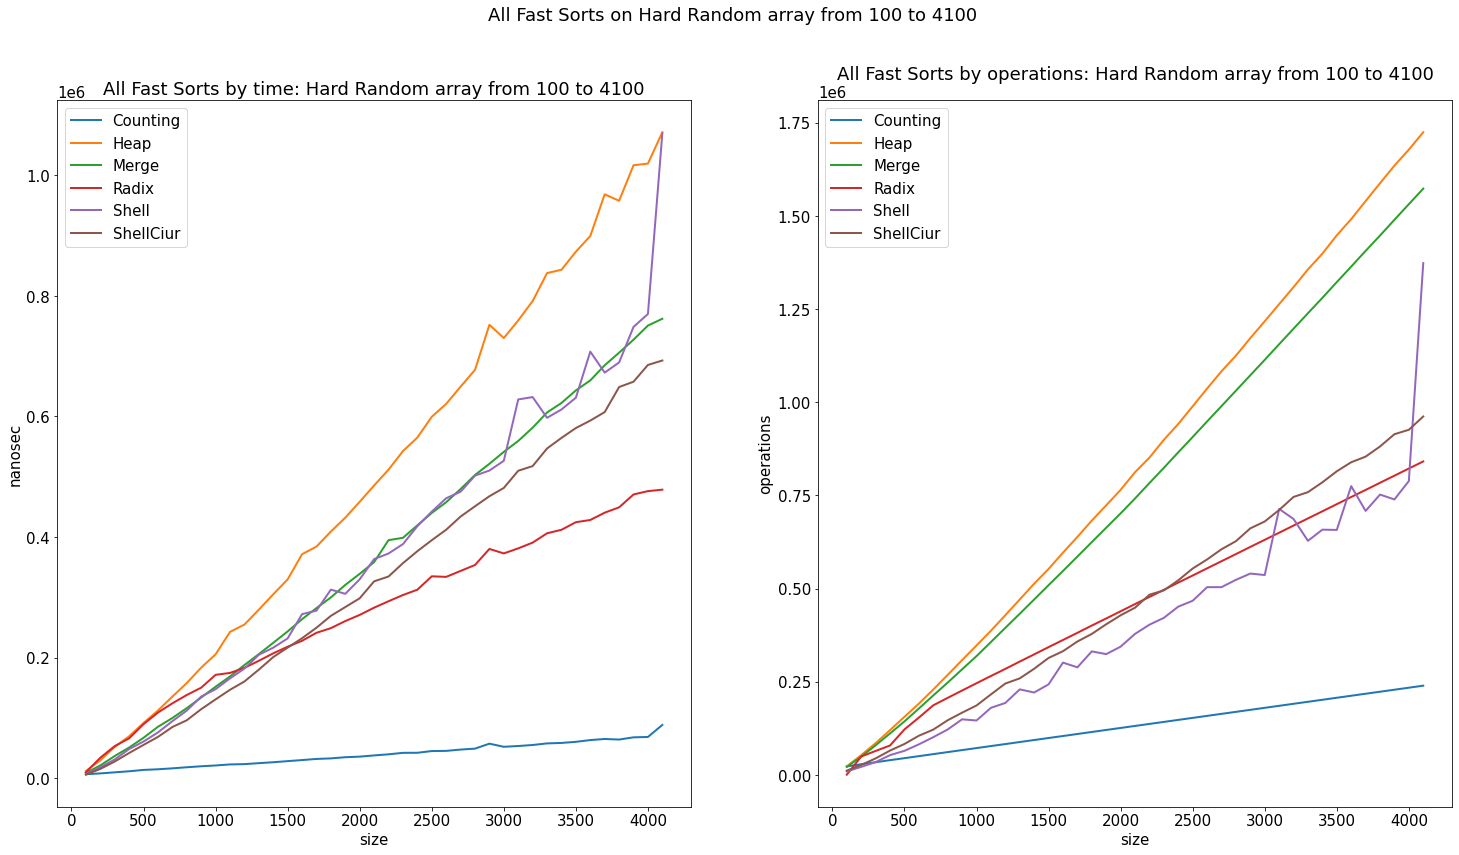

In [227]:
print('Fast Sorts | 100 - 4100 | Hard Random')
plotAllSortsTestsFast('100','4100', 'hard')

Лучше всех на размерах 100 - 4100 с Большой генерацией является Counting <br>
Хуже всех на размерах 100 - 4100 с Большой генерацией является Bubble с Iv 1 (тяжело определить) <br>
По операциям аналогично

##### Almost Sorted

Slow Sorts | 50 - 300 | Almost Sorted


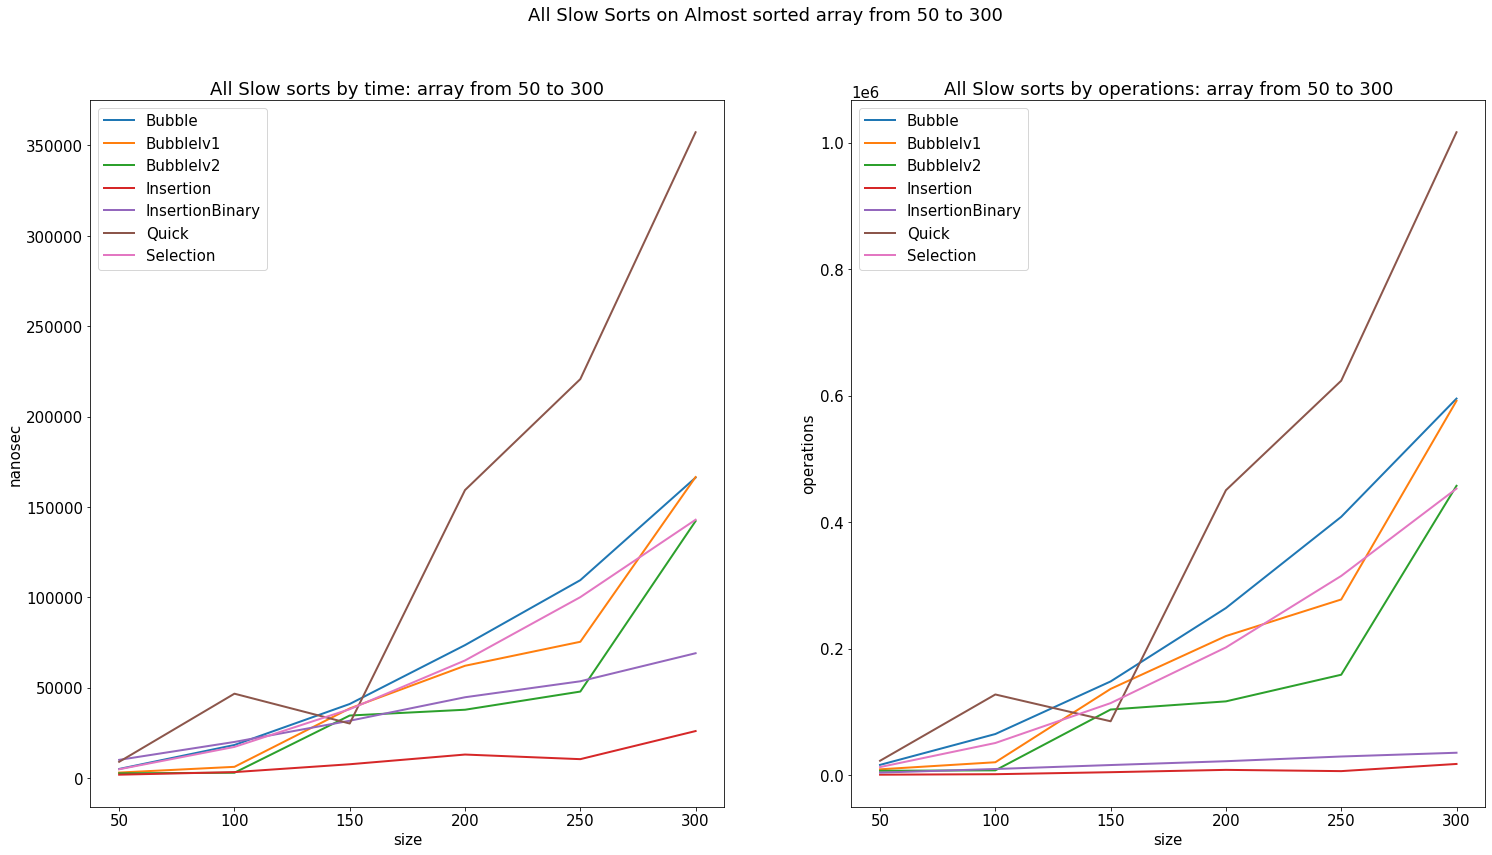

In [228]:
print('Slow Sorts | 50 - 300 | Almost Sorted')
plotAllSortsTestsSlow('50','300', 'near')

Fast Sorts | 50 - 300 | Almost Sorted


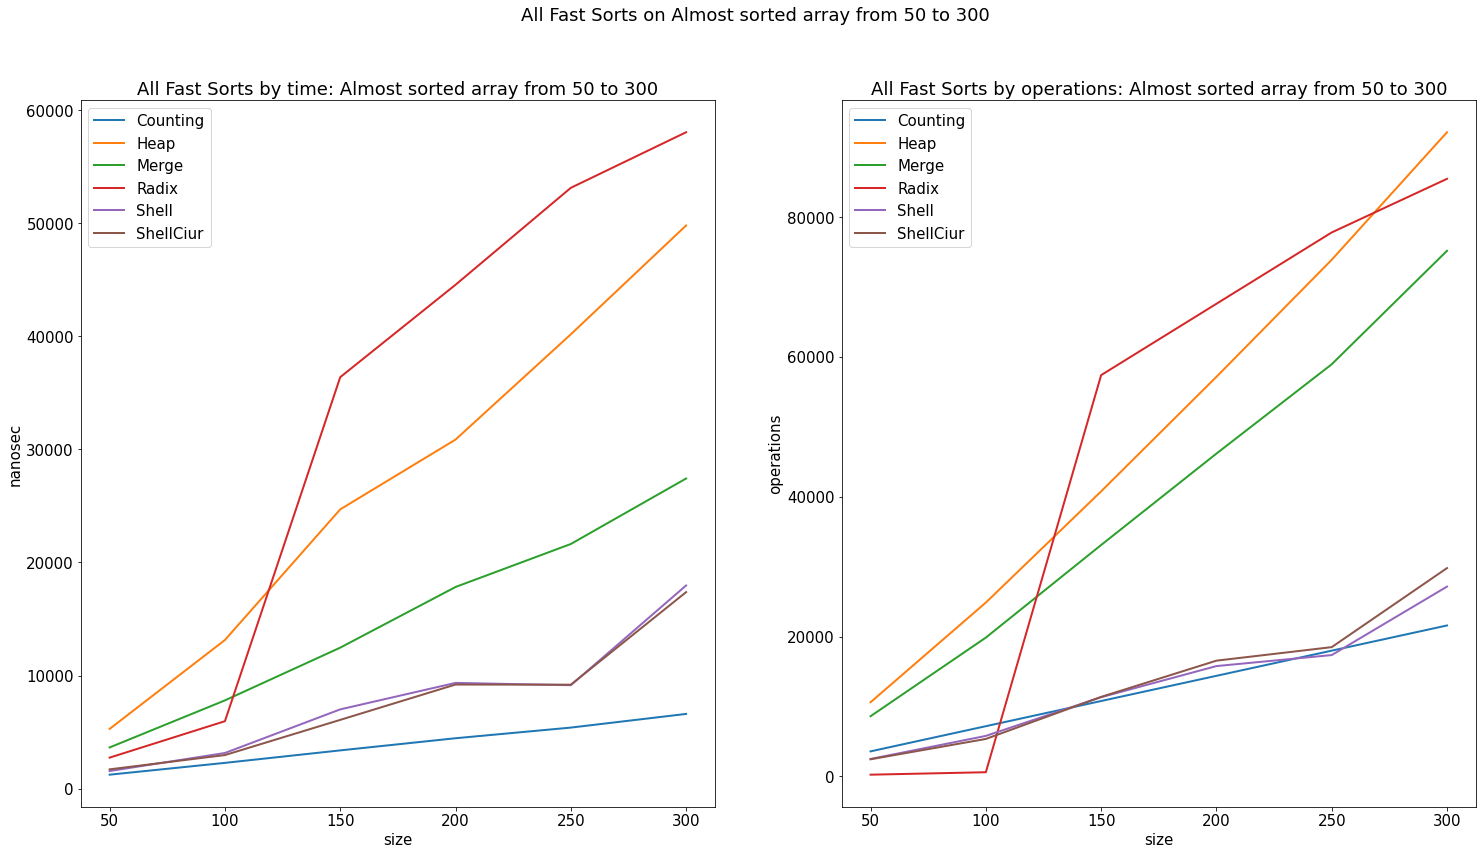

In [229]:
print('Fast Sorts | 50 - 300 | Almost Sorted')
plotAllSortsTestsFast('50','300', 'near')

Лучше всех на размерах 50 - 300 с Большой генерацией является Counting <br>
Хуже всех на размерах 50 - 300 с Большой генерацией является Quick <br>
По операциям аналогично

Slow Sorts | 100 - 4100 | Almost Sorted


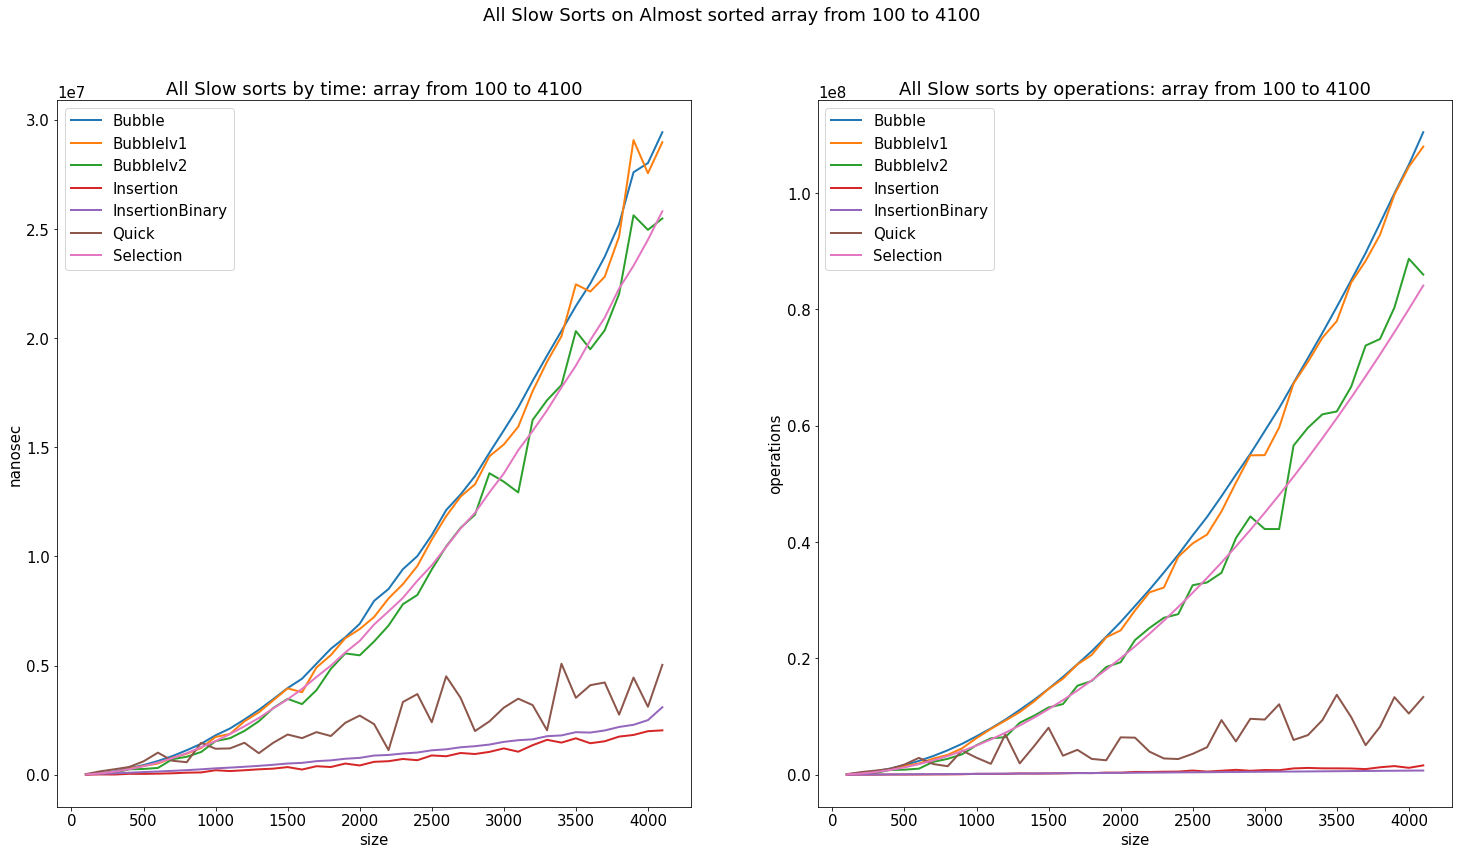

In [230]:
print('Slow Sorts | 100 - 4100 | Almost Sorted')
plotAllSortsTestsSlow('100','4100', 'near')

Fast Sorts | 100 - 4100 | Almost Sorted


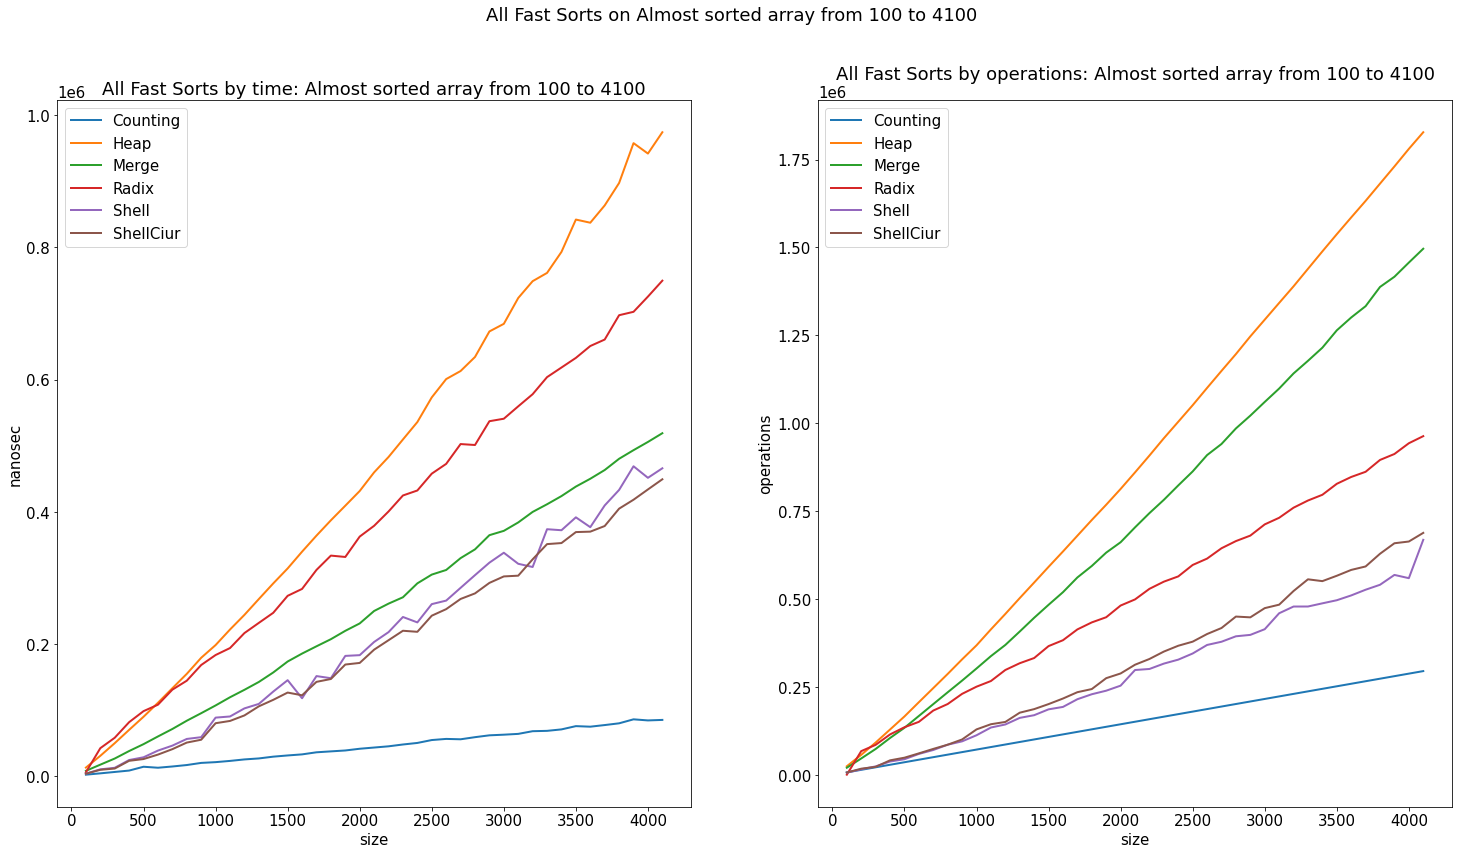

In [231]:
print('Fast Sorts | 100 - 4100 | Almost Sorted')
plotAllSortsTestsFast('100','4100', 'near')

Лучше всех на размерах 100 - 4100 с Большой генерацией является Counting <br>
Хуже всех на размерах 100 - 4100 с Большой генерацией является Bubble с Iv 1 (тяжело определить) <br>
По операциям аналогично

##### Descending Sorted

Slow Sorts | 50 - 300 | Descending Sorted


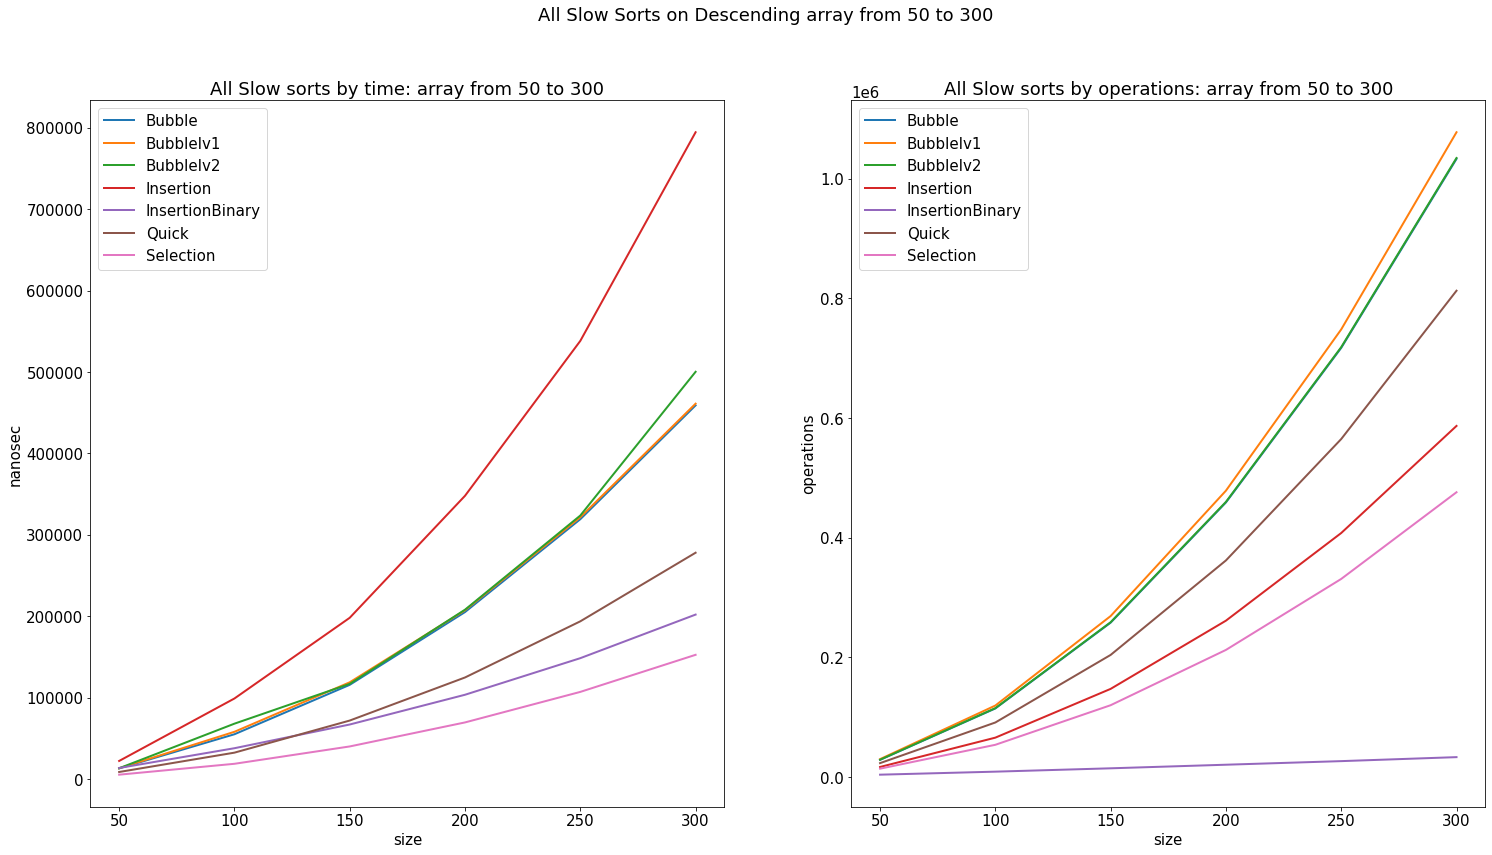

In [232]:
print('Slow Sorts | 50 - 300 | Descending Sorted')
plotAllSortsTestsSlow('50','300', 'desc')

Fast Sorts | 50 - 300 | Descending Sorted


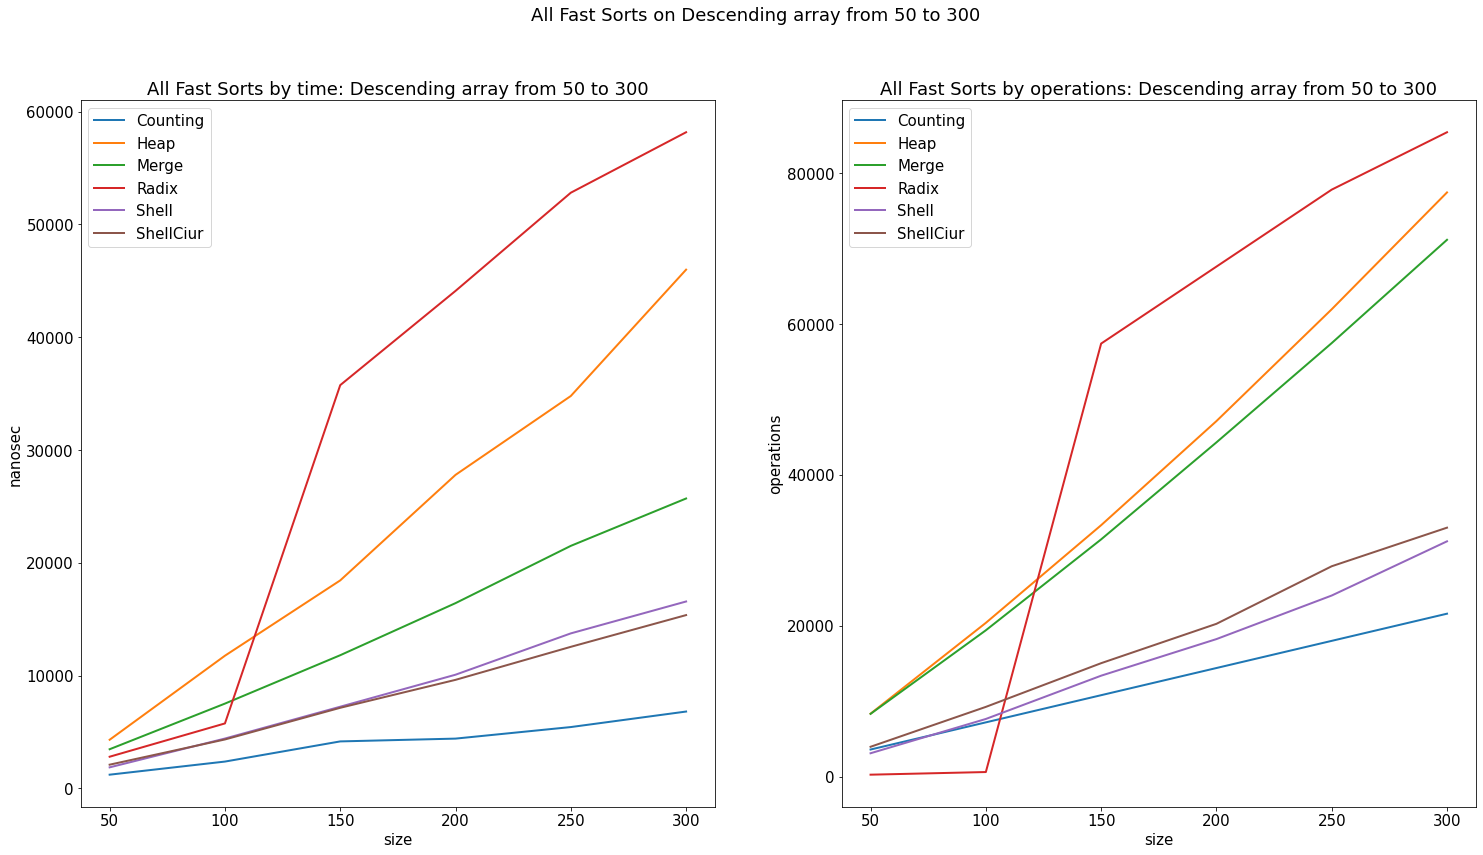

In [233]:
print('Fast Sorts | 50 - 300 | Descending Sorted')
plotAllSortsTestsFast('50','300', 'desc')

Лучше всех на размерах 50 - 300 с Большой генерацией является Counting <br>
Хуже всех на размерах 50 - 300 с Большой генерацией является Insertion <br>
По операциям очевидно худший Bubble

Slow Sorts | 100 - 4100 | Descending Sorted


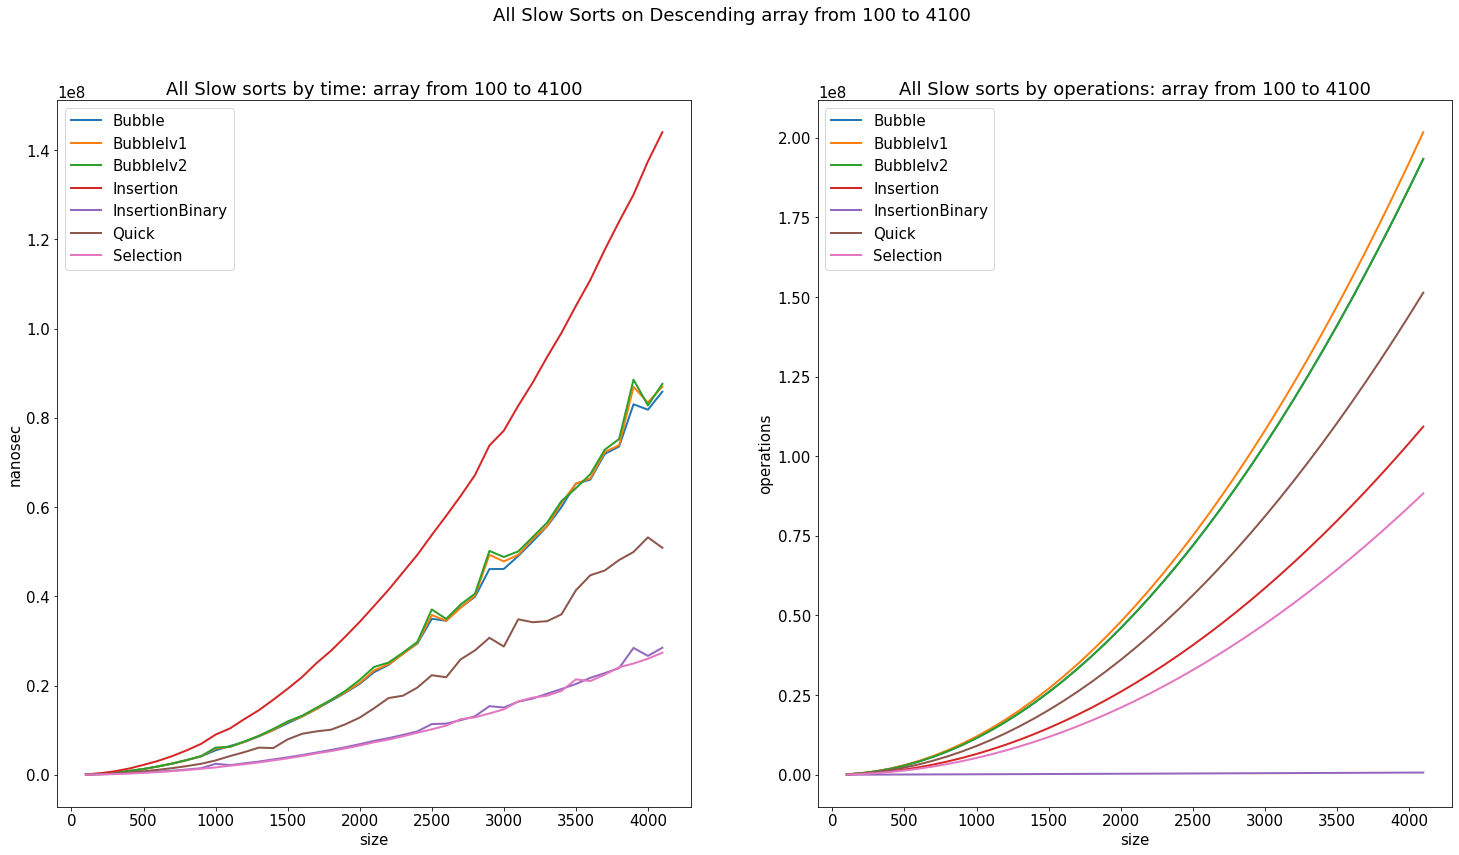

In [234]:
print('Slow Sorts | 100 - 4100 | Descending Sorted')
plotAllSortsTestsSlow('100','4100', 'desc')

Fast Sorts | 100 - 4100 | Descending Sorted


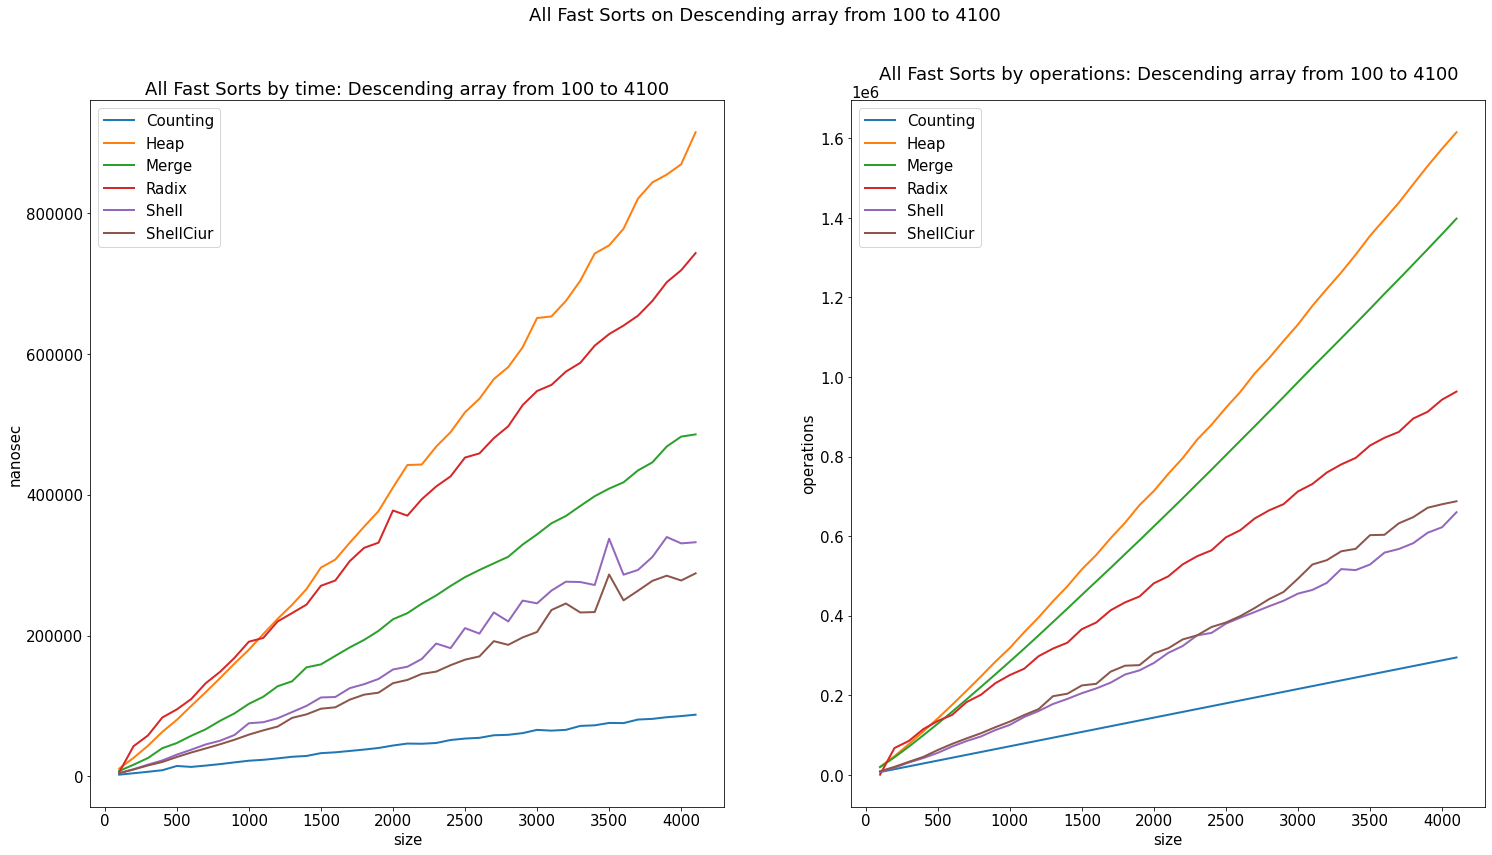

In [235]:
print('Fast Sorts | 100 - 4100 | Descending Sorted')
plotAllSortsTestsFast('100','4100', 'desc')

Лучше всех на размерах 100 - 4100 с Большой генерацией является Counting <br>
Хуже всех на размерах 100 - 4100 с Большой генерацией является Selection или Insertion Binary (тяжело определить) <br>
По операциям очевидно худший Bubble

## Каждая сортировка

In [236]:
def plotSoloFastSortTests(numStart : str, numEnd : str, sortInd : int):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  param = 'time'
  for type in ['medm', 'hard', 'near', 'desc']:
    mapSortsFast[numEnd][type][sortInd].plot(ax=axs[0], x='size', y=param, xlabel='size', ylabel=param, 
                                             title=f'{arrayNamesFast[sortInd]} by {param}: Array from {numStart} to {numEnd}', label=mapTypeInfo[type])
  axs[0].legend()

  param = 'operations'
  for type in ['medm', 'hard', 'near', 'desc']:
    mapSortsFast[numEnd][type][sortInd].plot(ax=axs[1], x='size', y=param, xlabel='size', ylabel=param, 
                                             title=f'{arrayNamesFast[sortInd]} by {param}: Array from {numStart} to {numEnd}', label=mapTypeInfo[type])
  axs[1].legend()
  plt.show()

In [237]:
def plotSoloSlowSortTests(numStart : str, numEnd : str, sortInd : int):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  param = 'time'
  for type in ['medm', 'hard', 'near', 'desc']:
    mapSortsSlow[numEnd][type][sortInd].plot(ax=axs[0], x='size', y=param, xlabel='size', ylabel=param, 
                                             title=f'{arrayNamesSlow[sortInd]} by {param}: Array from {numStart} to {numEnd}', label=mapTypeInfo[type])
  axs[0].legend()

  param = 'operations'
  for type in ['medm', 'hard', 'near', 'desc']:
    mapSortsSlow[numEnd][type][sortInd].plot(ax=axs[1], x='size', y=param, xlabel='size', ylabel=param, 
                                             title=f'{arrayNamesSlow[sortInd]} by {param}: Array from {numStart} to {numEnd}', label=mapTypeInfo[type])
  axs[1].legend()
  plt.show()

In [238]:
# for i in range(len(arrayNamesFast)):
#   print(arrayNamesFast[i] + '\n')
#   plotSoloSortTests('50', '300', i)
#   plotSoloSortTests('100', '4100', i)
#   print('\n')

In [239]:
i = 0

Bubble



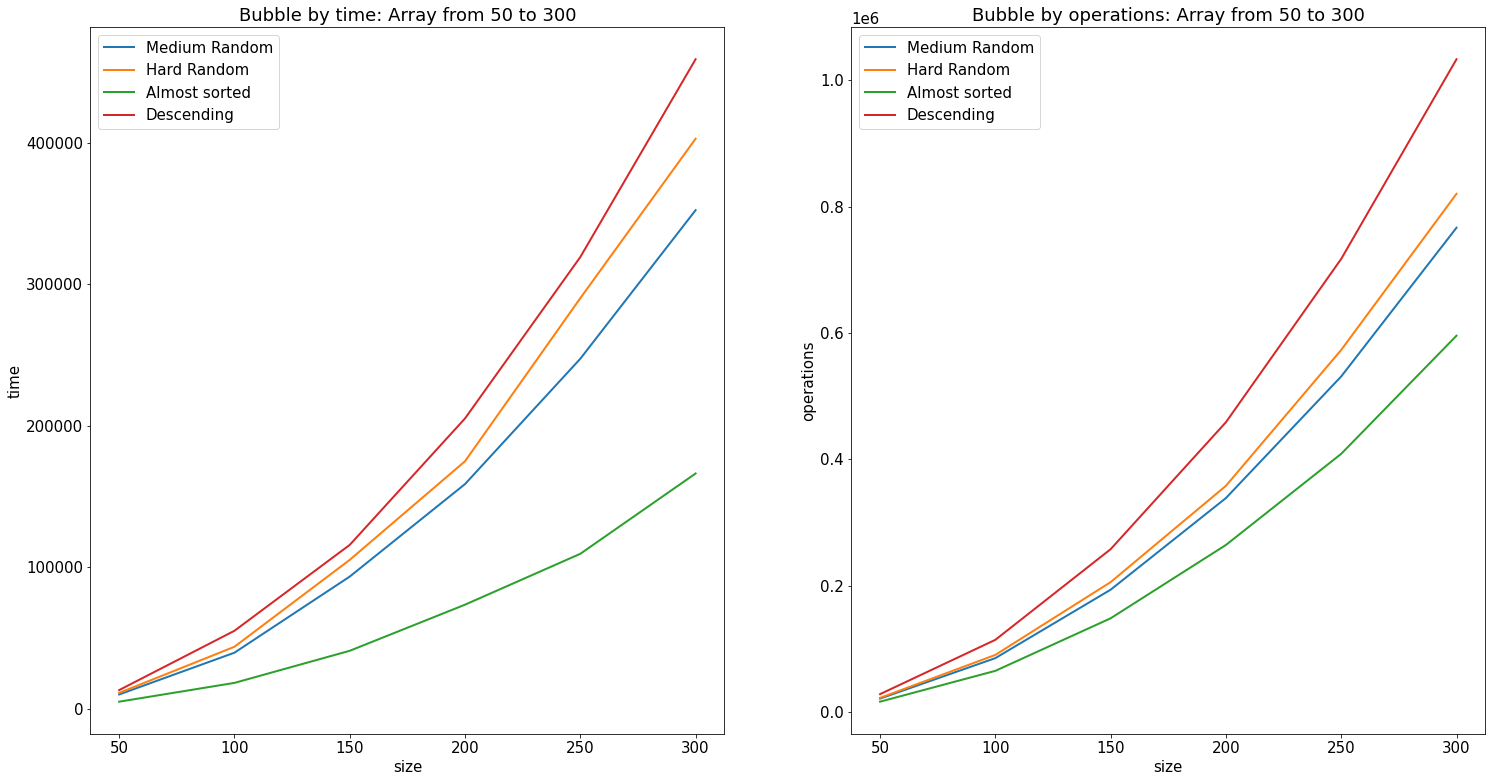

In [240]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

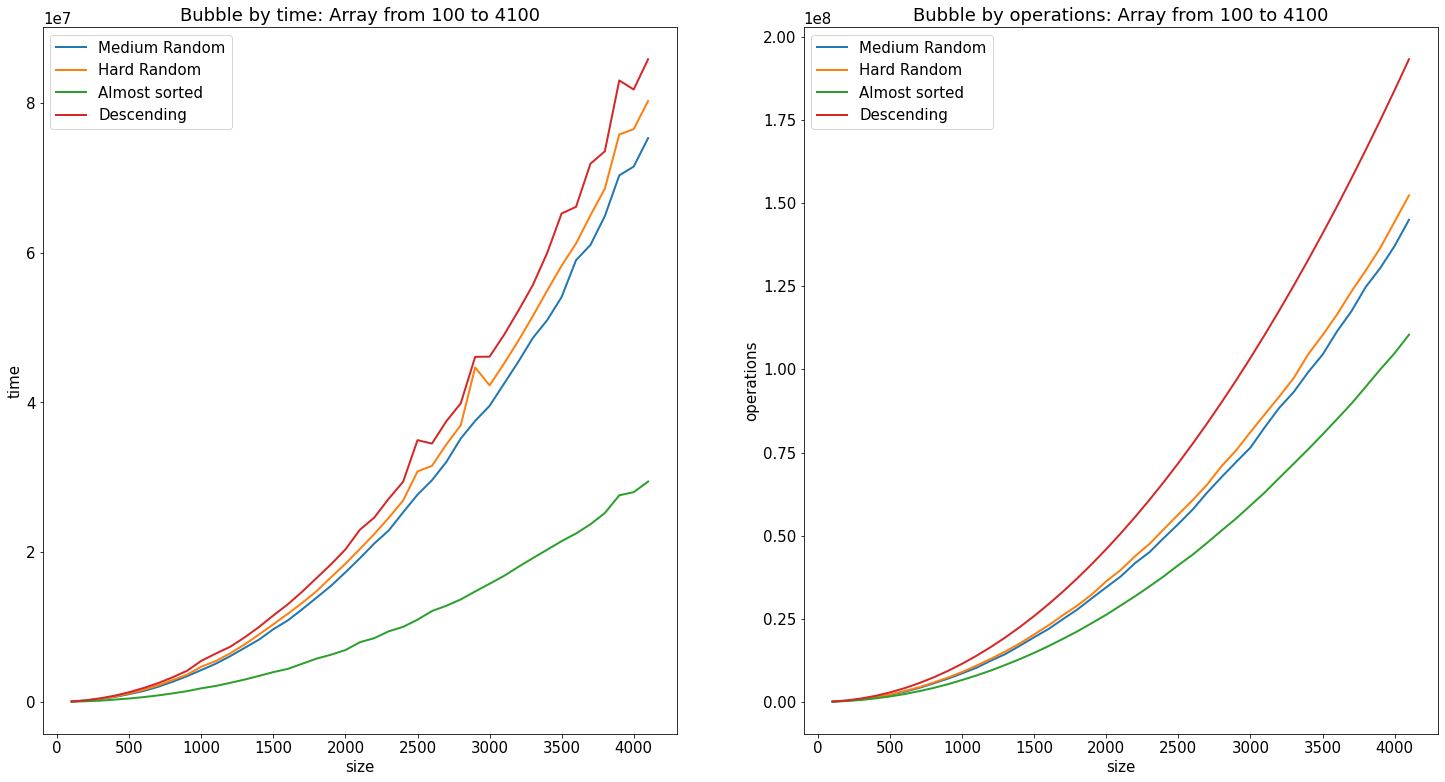

In [241]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Bubble Sort: <br>
Сложность в любом случае O($n^2$) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количество проделанных элементарных операций полностью отражает время выполнения сортировки <br>
Выбросы наблюдаются на всех входных - 

BubbleIv1



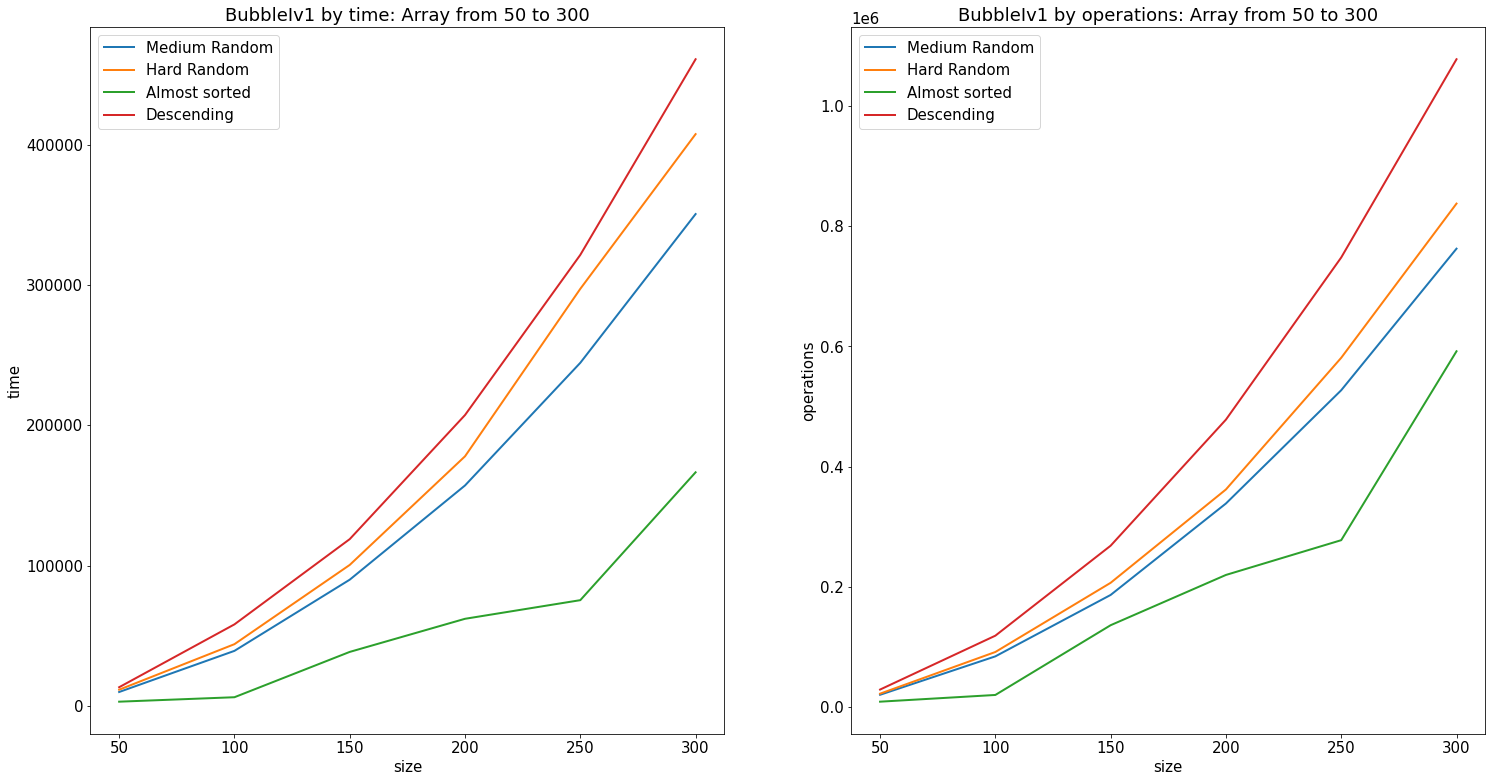

In [242]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

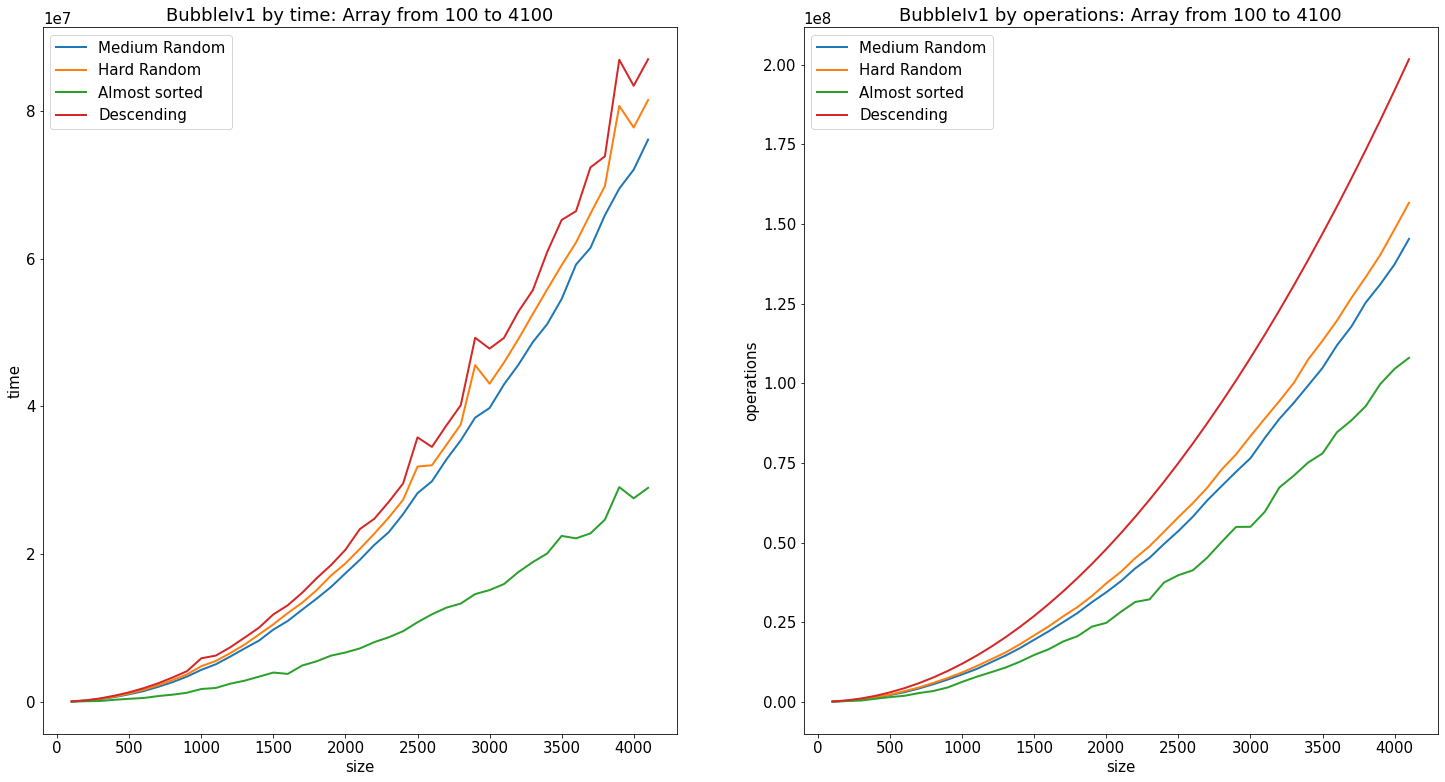

In [243]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Bubble Sort с условием Iverson 1: <br>
Сложность O($n^2$) <br>
Сложность в лучшем случае O(n) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки <br>

BubbleIv2



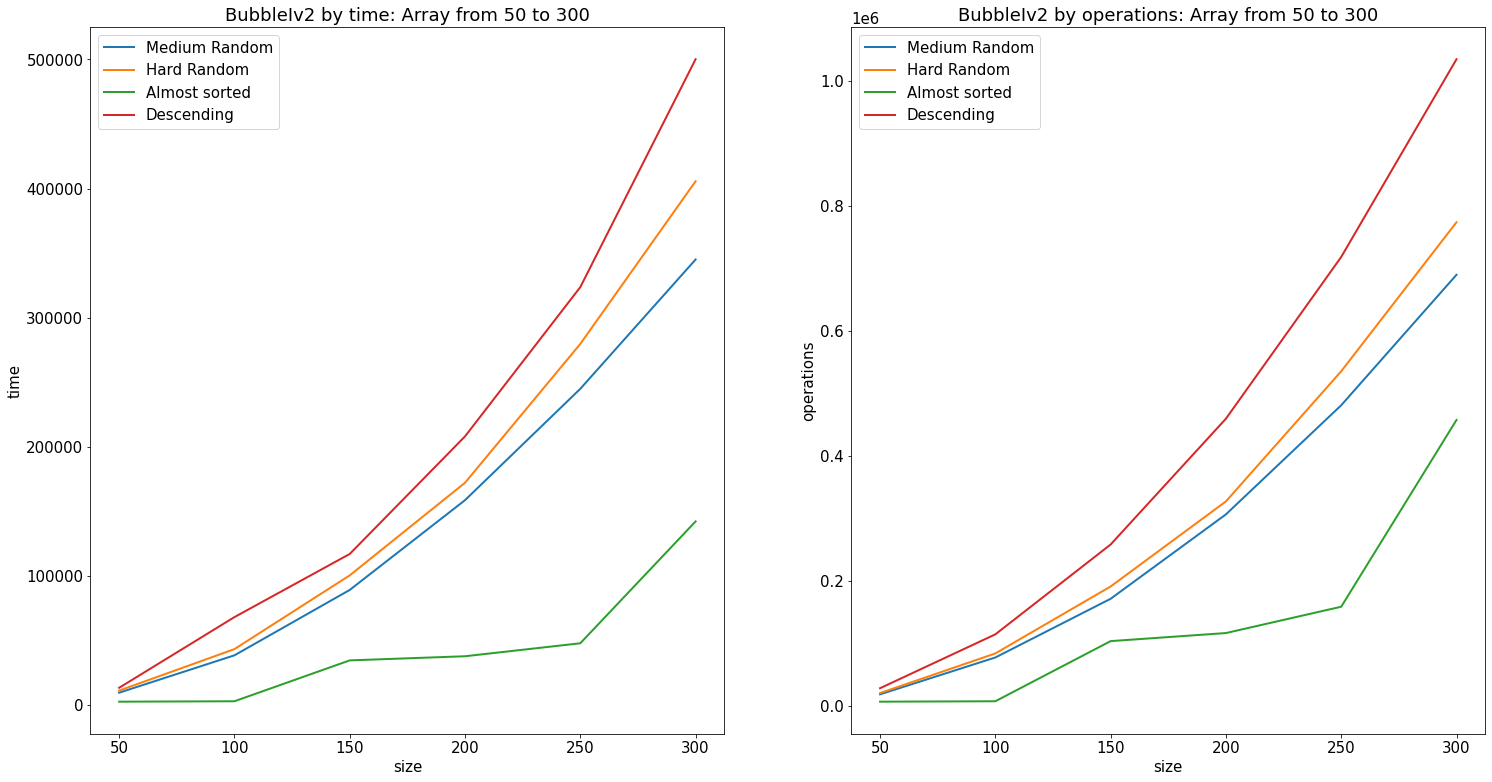

In [244]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

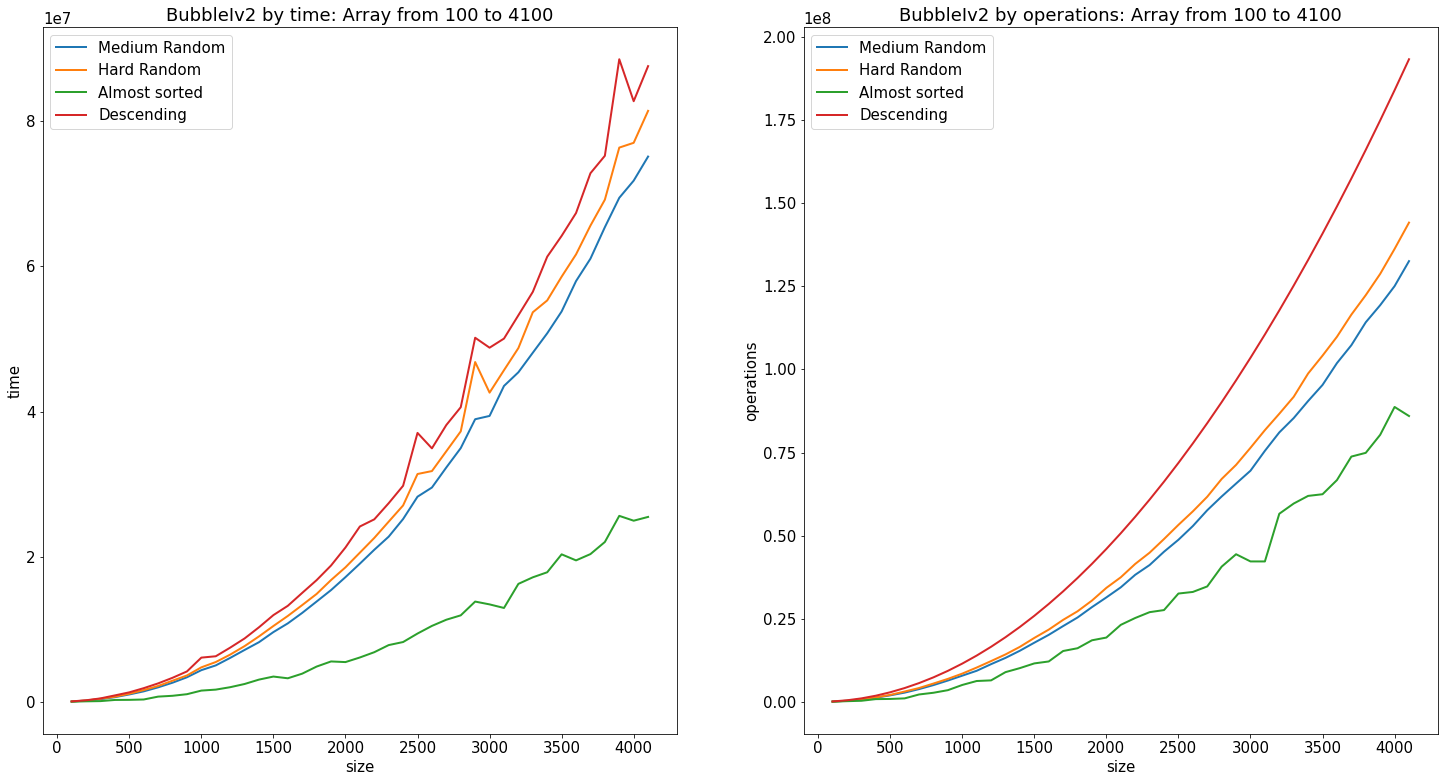

In [245]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Bubble Sort с условием Iverson 1 и 2: <br>
Сложность в худшем и среднем случае O($n^2$) <br>
Сложность в лучшем случае O(n) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки <br>
Выбросы по времени при size: 2500, 2850, 3900

Insertion



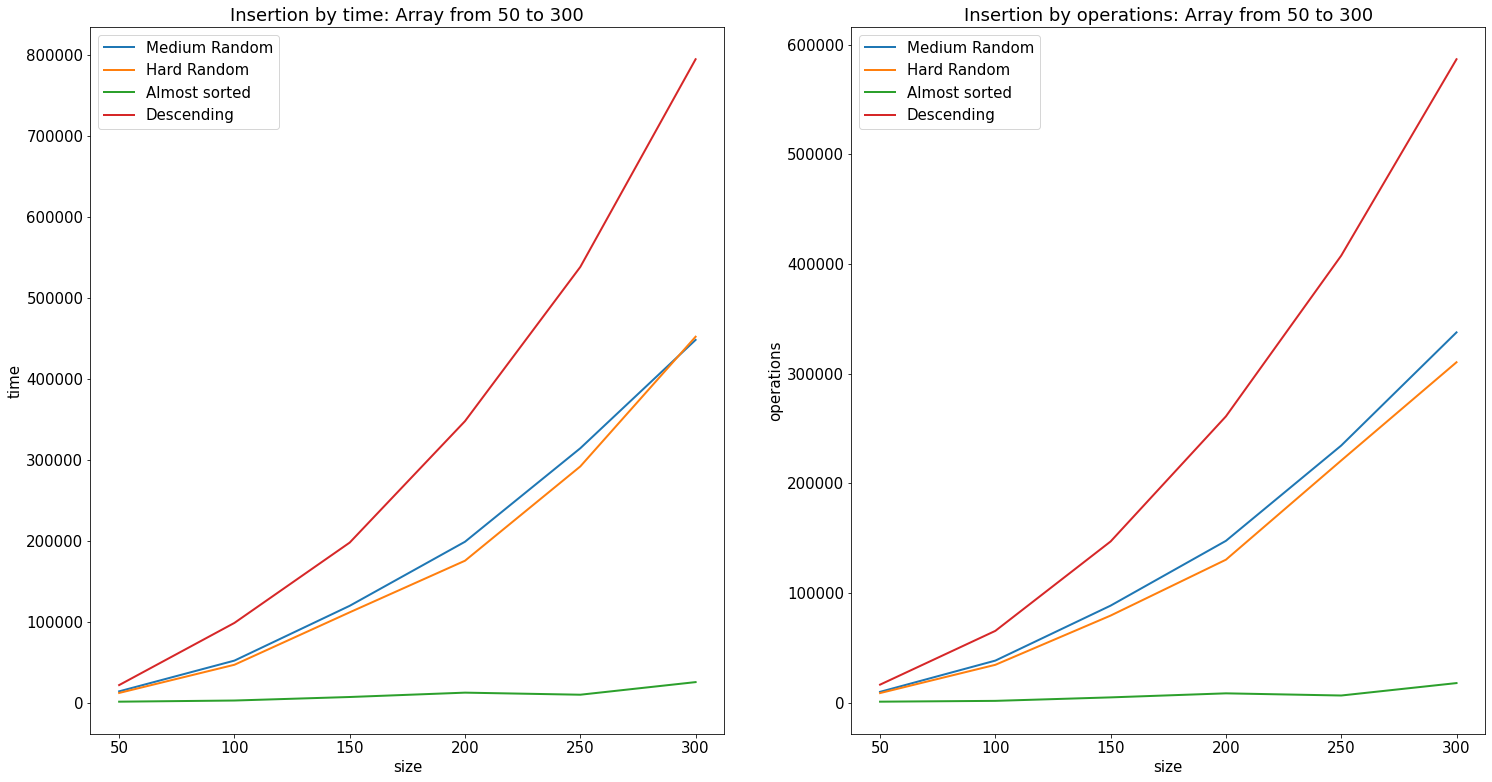

In [246]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

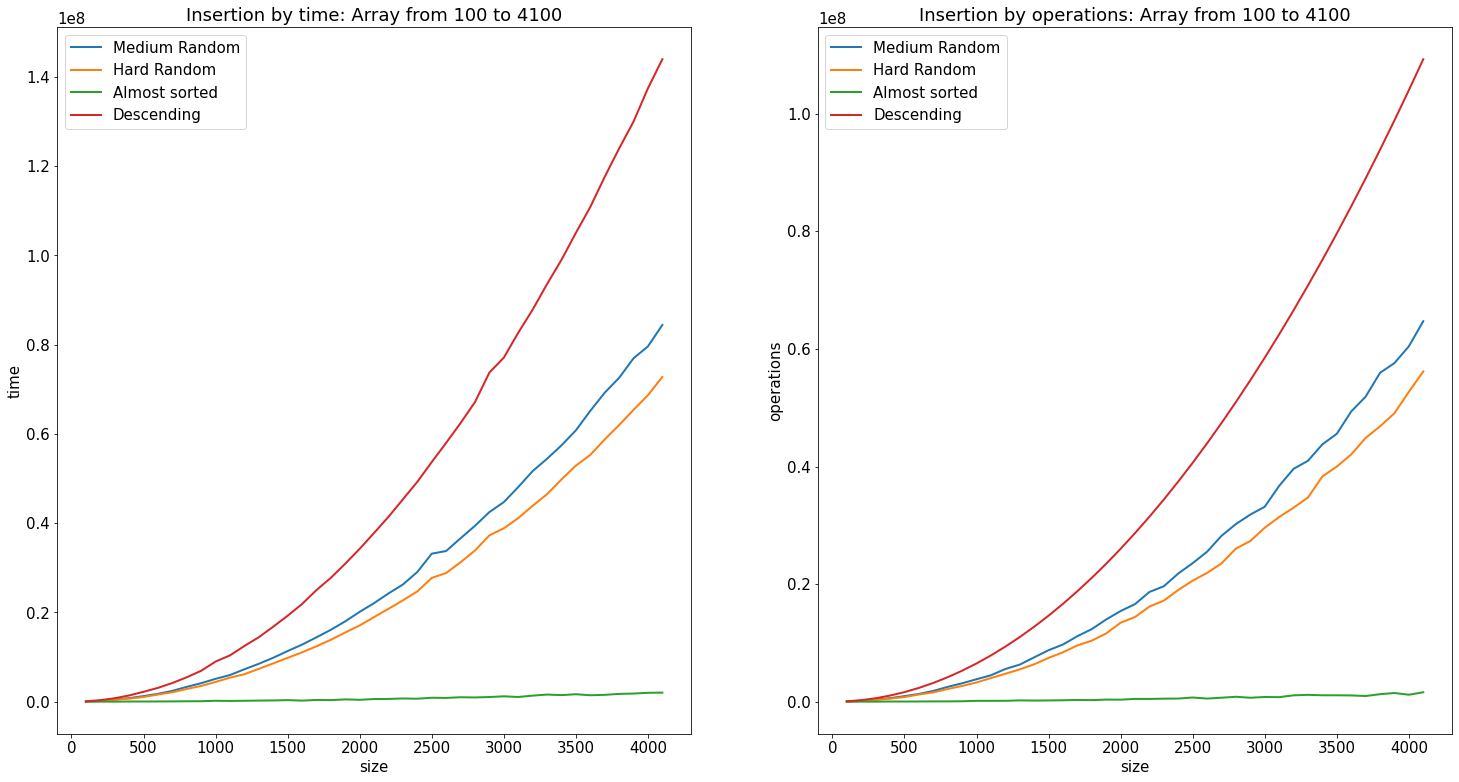

In [247]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Bubble Sort с условием Iverson 1 и 2: <br>
Сложность O($n^2$) <br>
Сложность в лучшем случае O(n) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки <br>
Серьёзные выбросы по времени не замечены

InsertionBinary



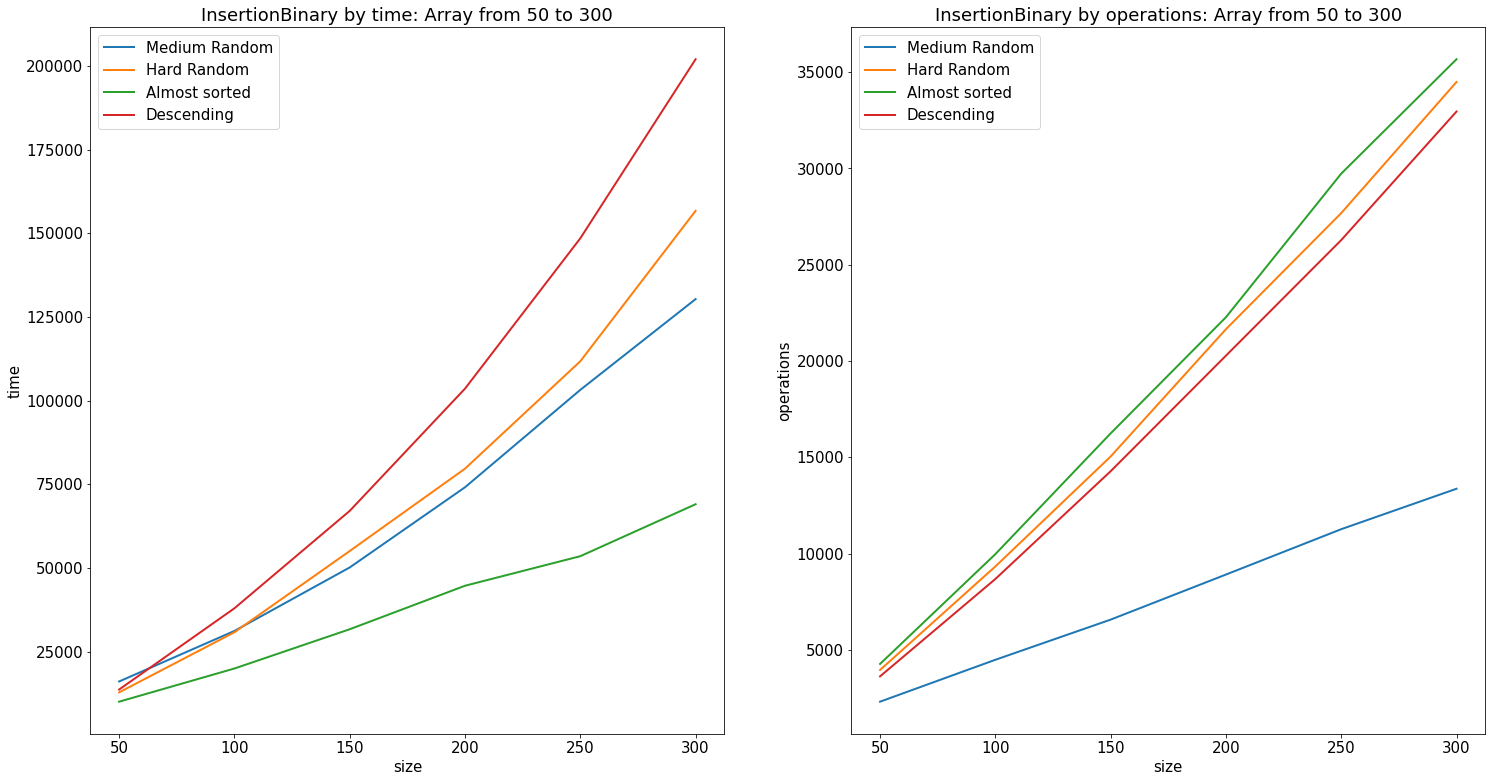

In [248]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

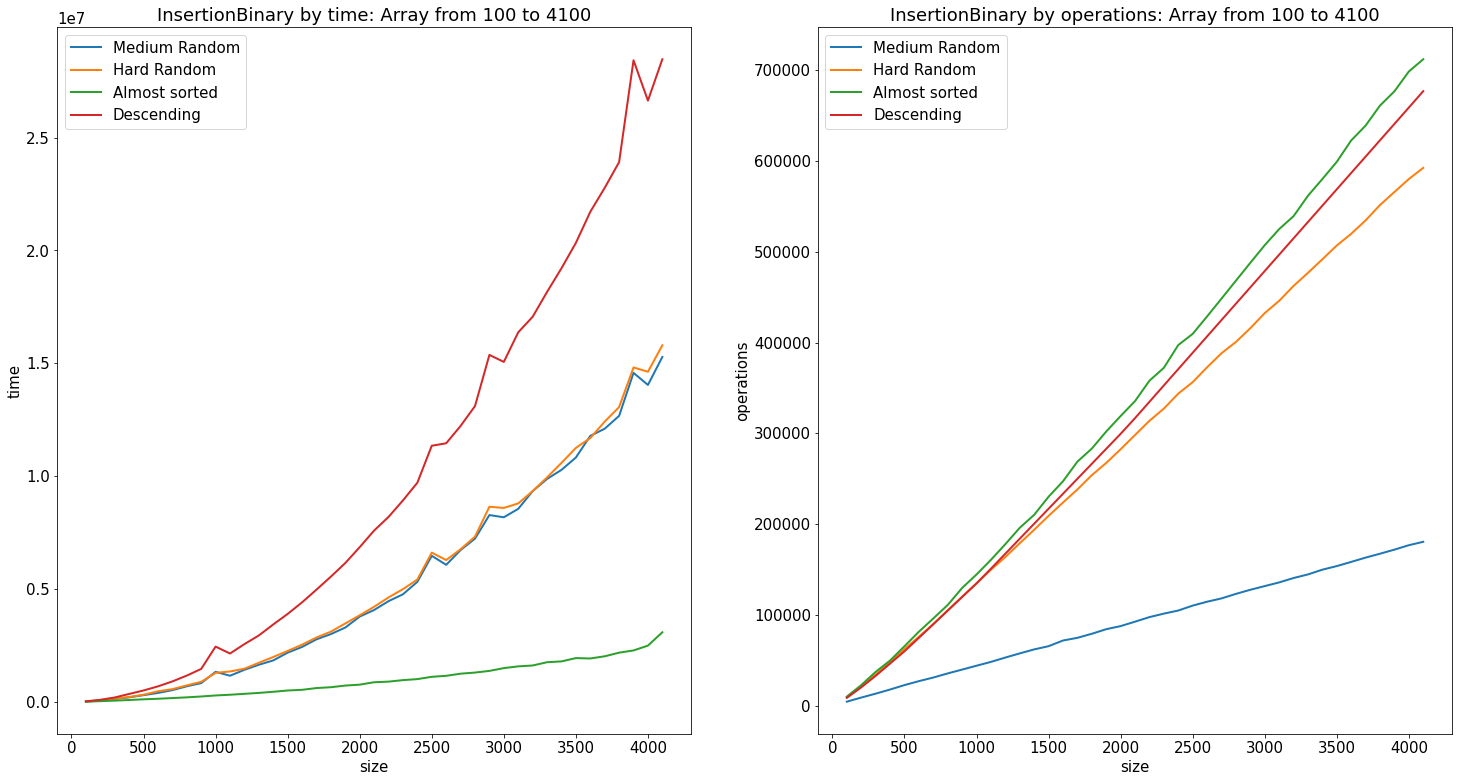

In [249]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Insertion Sort: <br>
Сложность O($n^2$) <br>
Сложность в лучшем случае O(n) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количество проделанных элементарных операций не зависит от времени выполнения сортировки (из-за большого числа обращений по индексам к вектору) <br>
Выбросы по времени при size: 1000, 2500, 2900, 3800

Quick



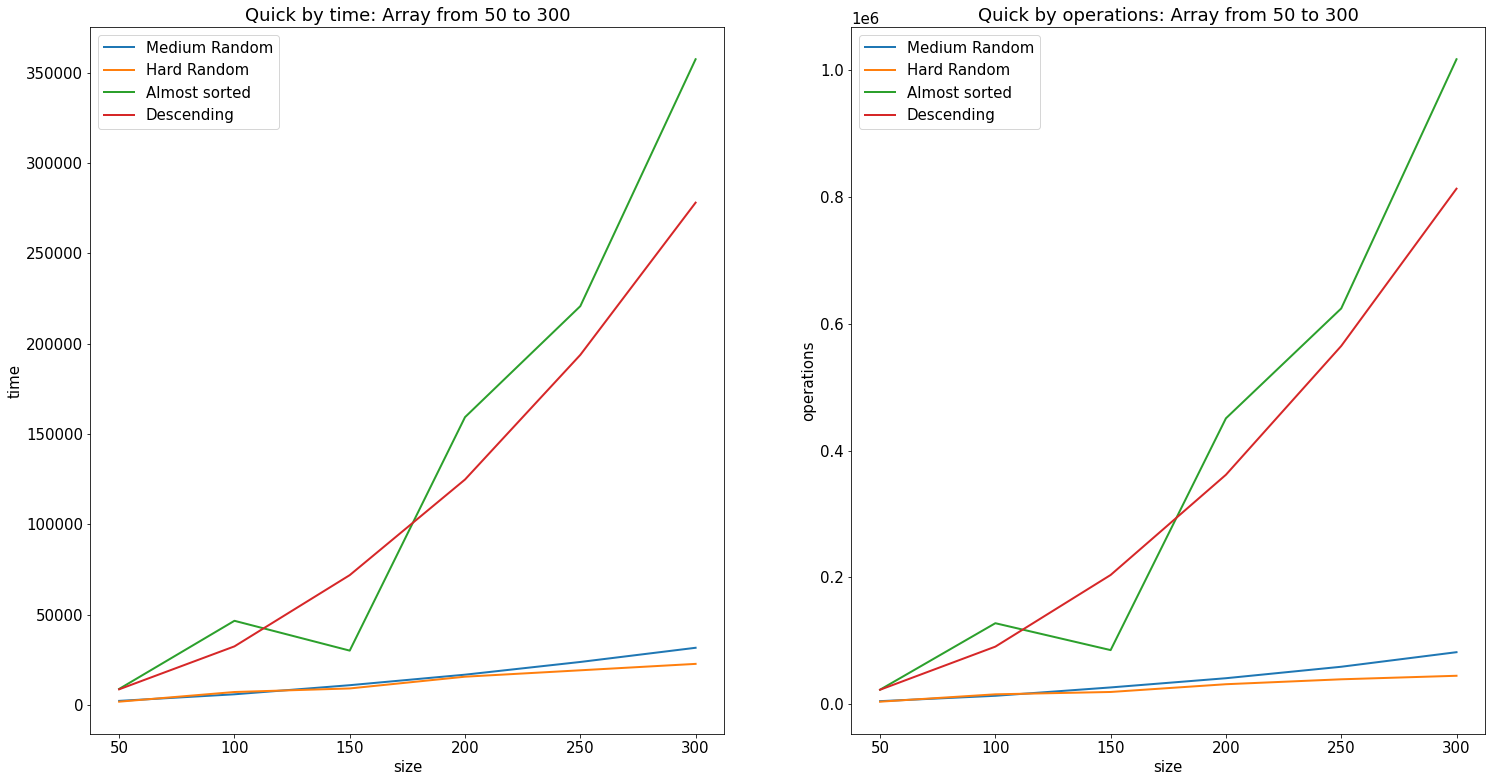

In [250]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

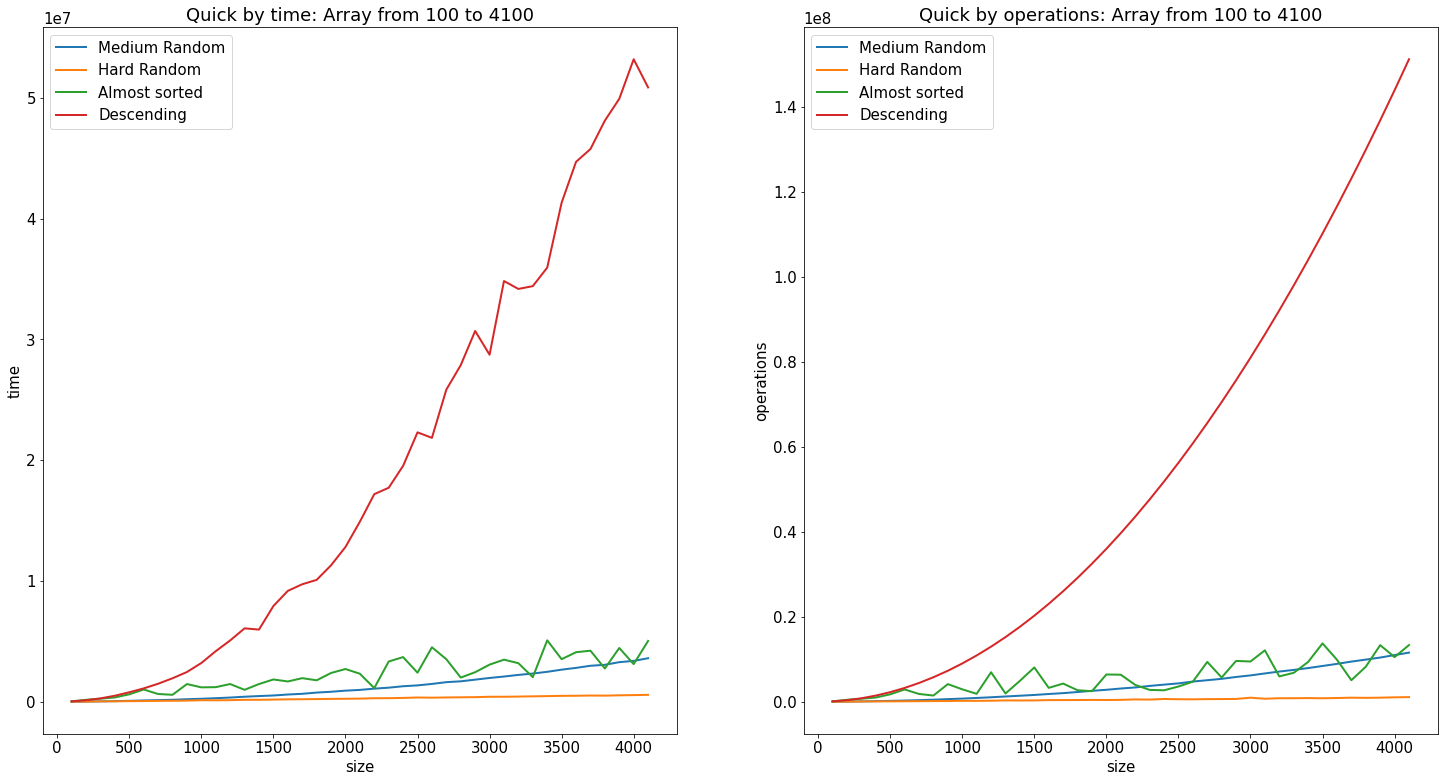

In [251]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Quick Sort: <br>
Сложность в худшем случае O($n^2$) <br>
Сложность в среднем лучше O($n*log(n)$) <br>
Сложность в лучшем случае близка к O(n) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки (особенно заметно на обратно отсортированном массиве)<br>
Обнаружено довольно большое число выбросов на Обратно отсортированном массиве и Почти отсортированном массиве

Selection



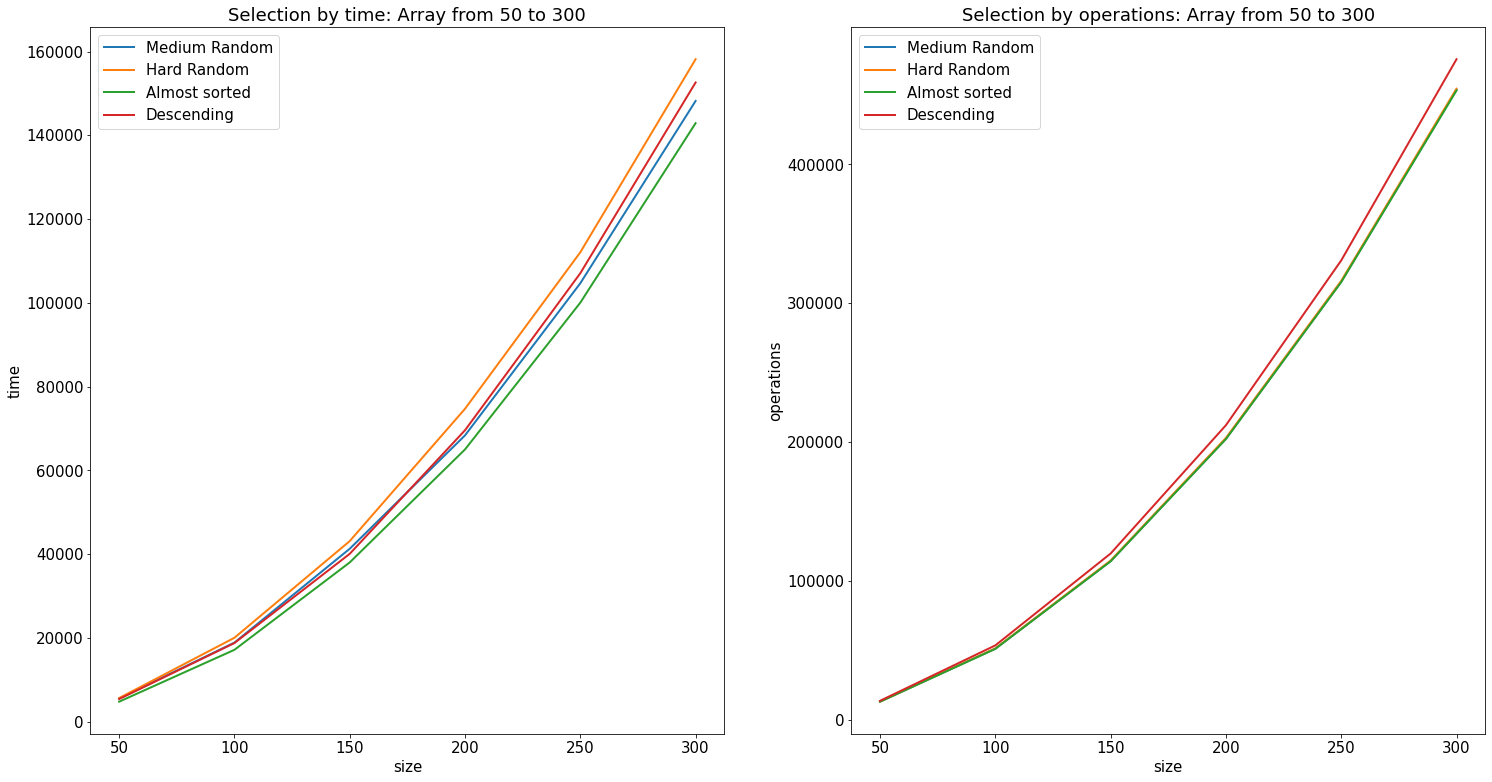

In [252]:
print(arrayNamesSlow[i] + '\n')
plotSoloSlowSortTests('50', '300', i)

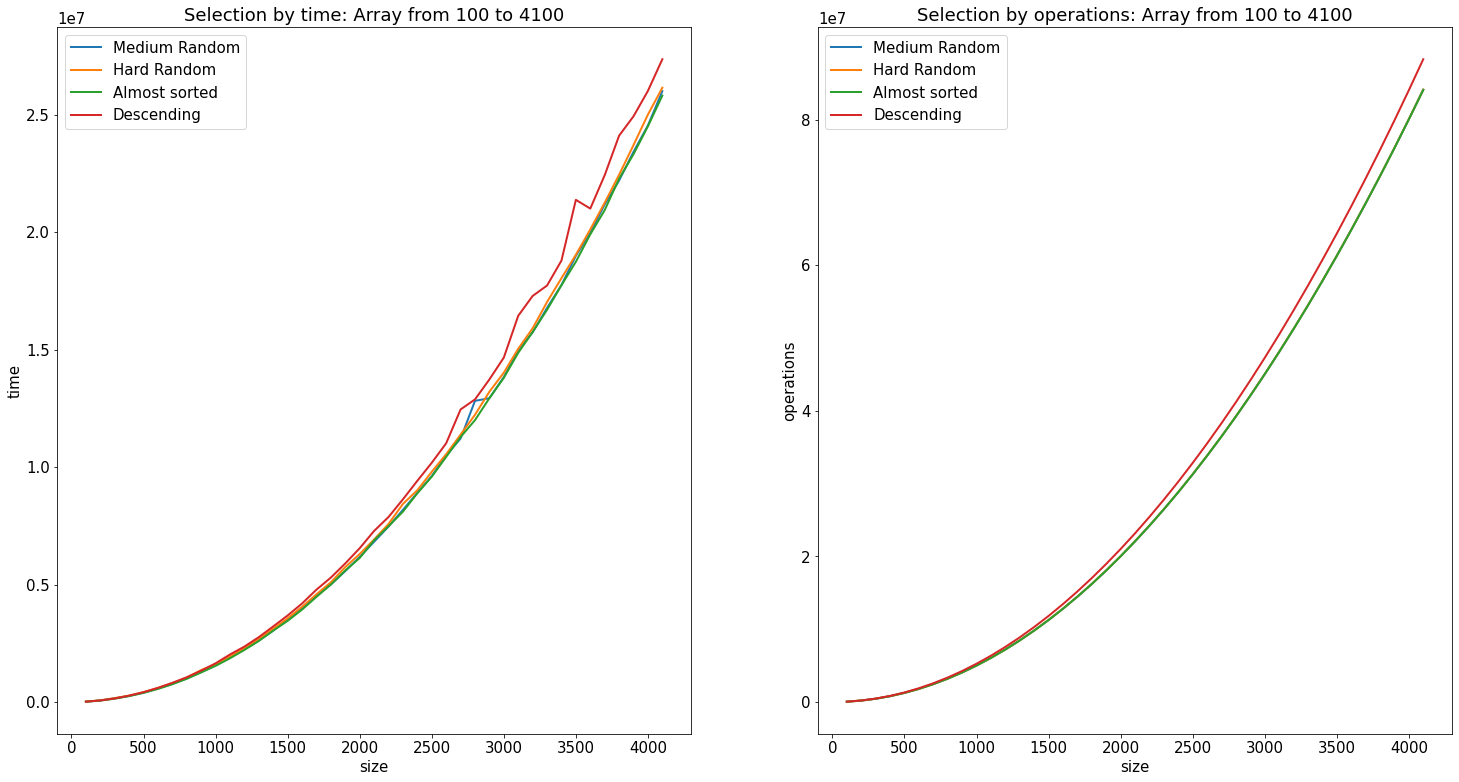

In [253]:
plotSoloSlowSortTests('100', '4100', i)
i += 1

#### Анализ графика Selection Sort: <br>
Сложность всегда O($n^2$) (самый точный график) <br>
Лучшие входные данные: Почти отсортированный массив <br>
Худшие входные данные: Обратно отсортированный массив (но разница с худшим минимальна) <br>
Количества проделанных элементарных операций полностью очень похожи и не отражают время выполнения сортировки <br>
Обнаружено немного выбросов при рабьоте с обратно отсортированным массивом при size от 3000 до 3600

In [254]:
i = 0

Counting



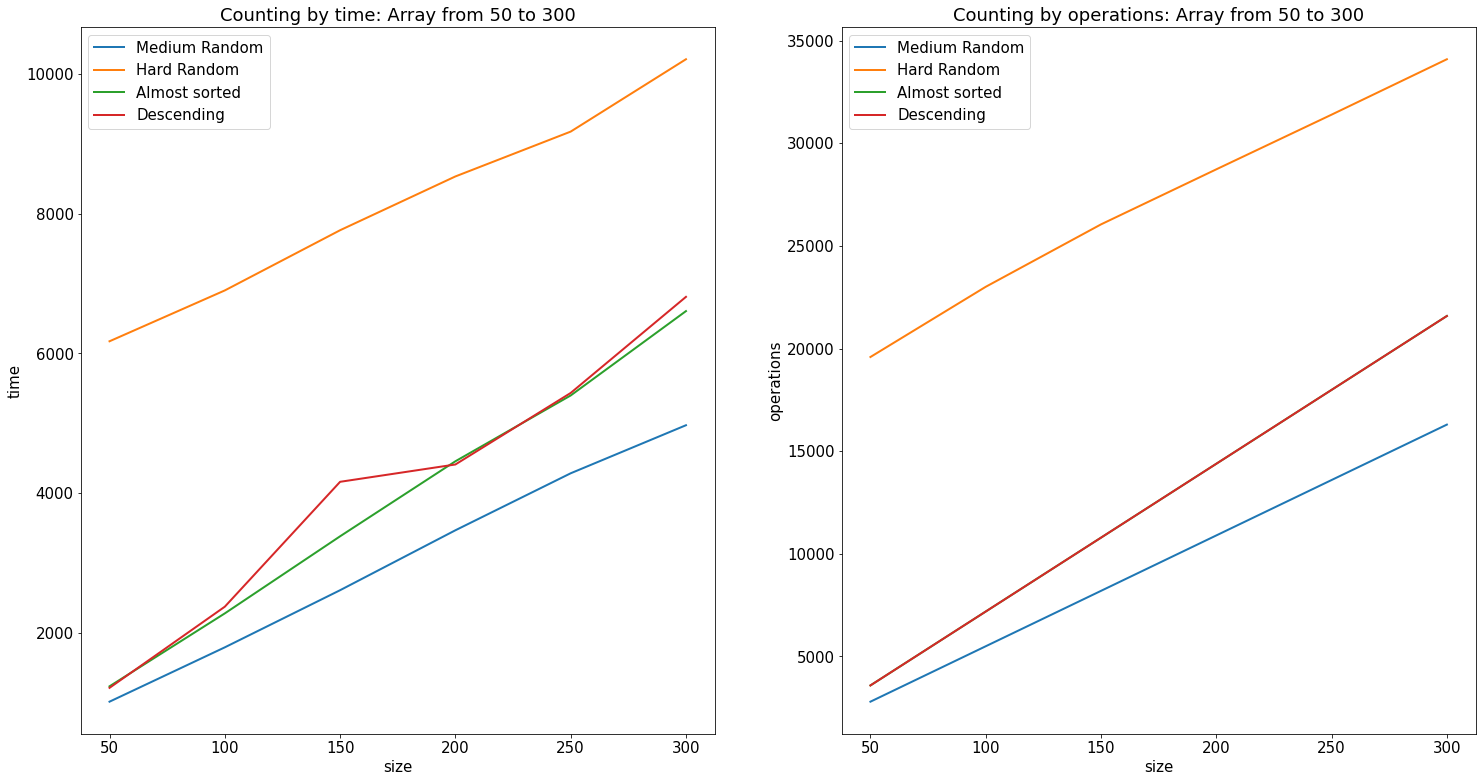

In [255]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

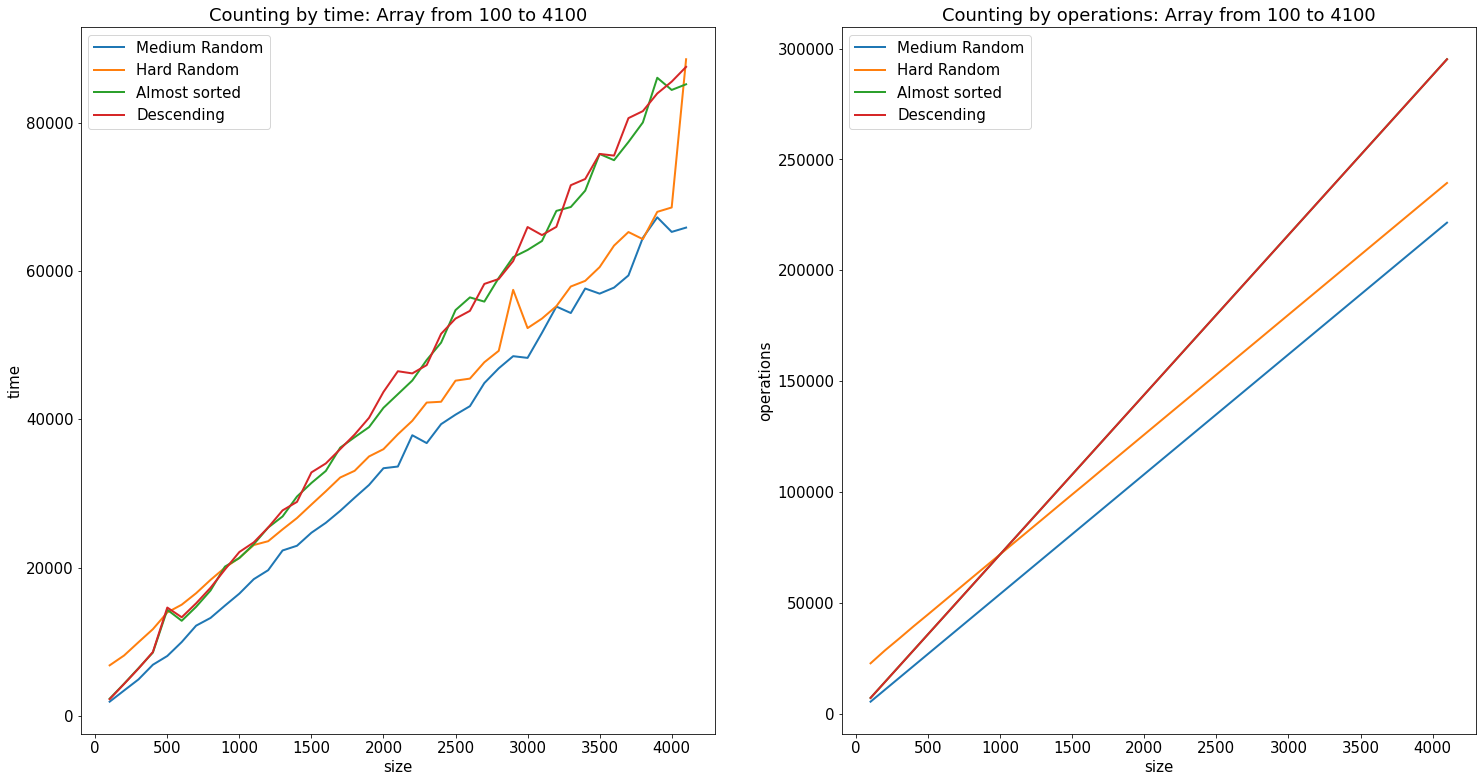

In [256]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика стабильного Counting Sort: <br>
Сложность на всех данных O($n + k$) <br>
Лучшие входные данные: Полность случаный массив с маленькими значениями <br>
Худшие входные данные: Полность случаный массив с большими значениями (но разница между всеми минимальна на больших размерах) <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки <br>
Обнаружено очень много отклонений и выбросов при работе со всеми массивами при size от 500 до 4000, хотя количество операций росло стабильно <br>
Можно заметить, что на маленьких входных данных Counting Sort работает медленно и сильно различно по времени. Это связано с созданием и обращением к дополнительному массиву для подсчёта элементов, который не оправдывает своё создание.

Heap



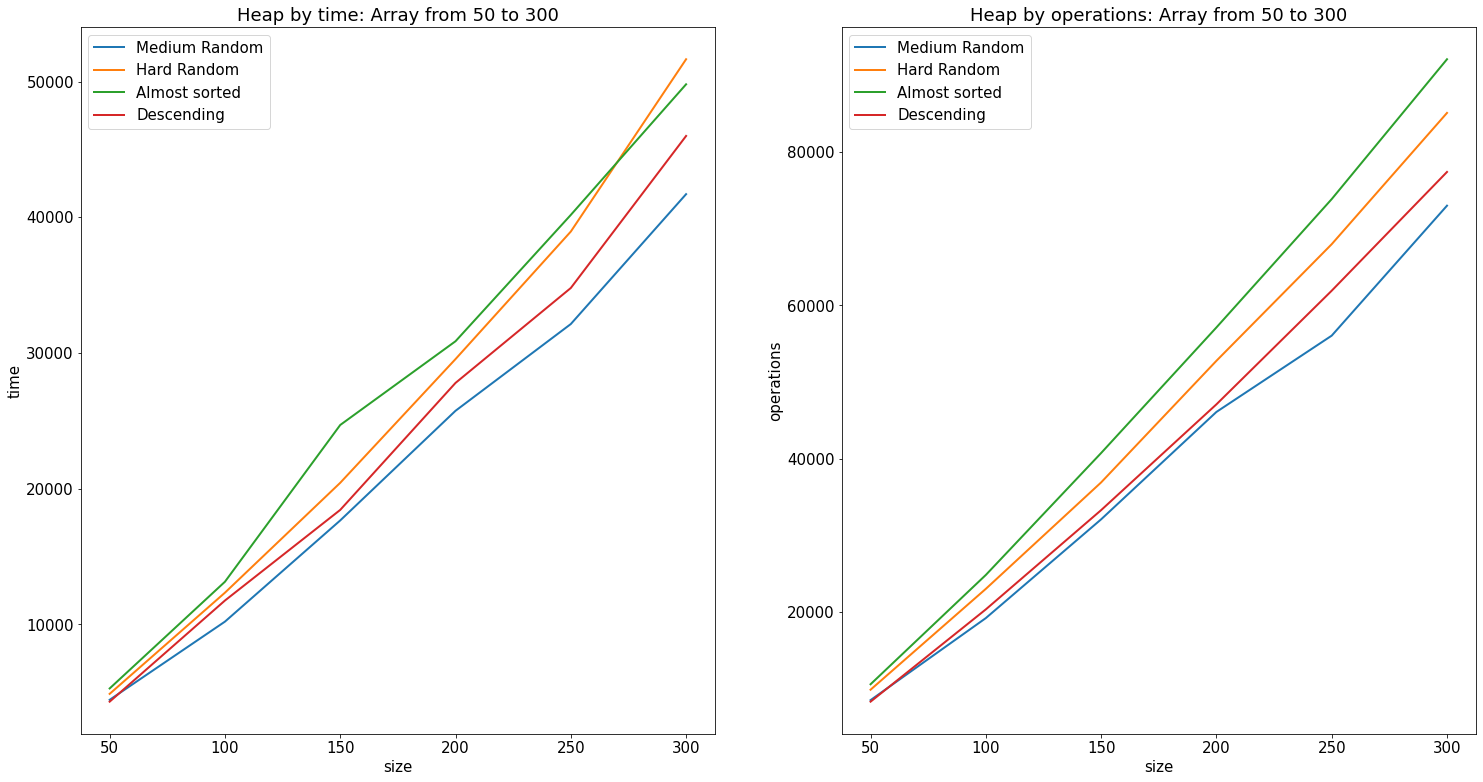

In [257]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

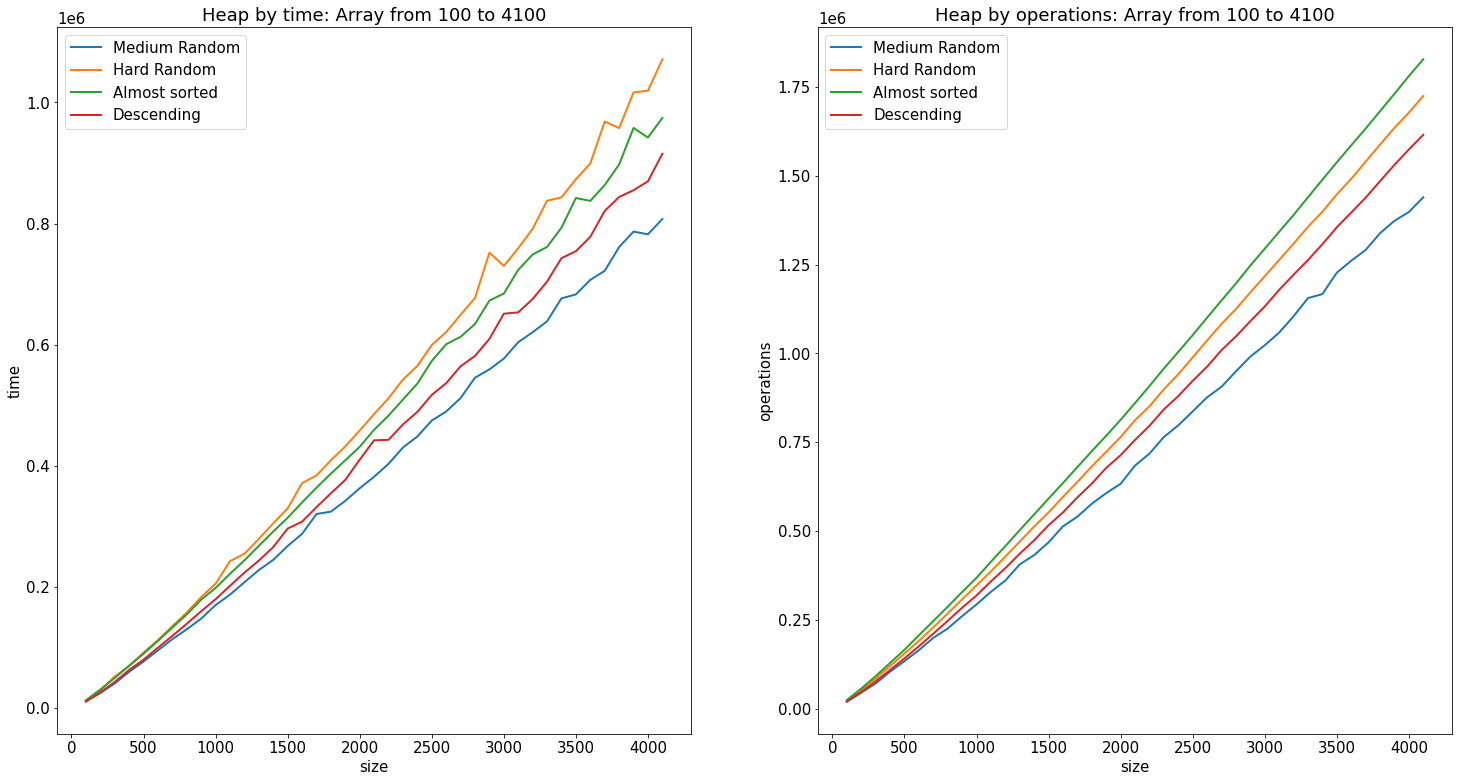

In [258]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика Heap Sort: <br>
Сложность на всех данных O($n*log(n)$) <br>
Лучшие входные данные: Полностью случаный массив с маленькими значениями <br>
Худшие входные данные: Полностью случаный массив с большими значениями (но разница с между всеми минимальна) <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки <br>
Обнаружено довольно много отклонений при работе со всеми массивами при size от 2900 до 4000, хотя количество операций росло стабильно

Merge



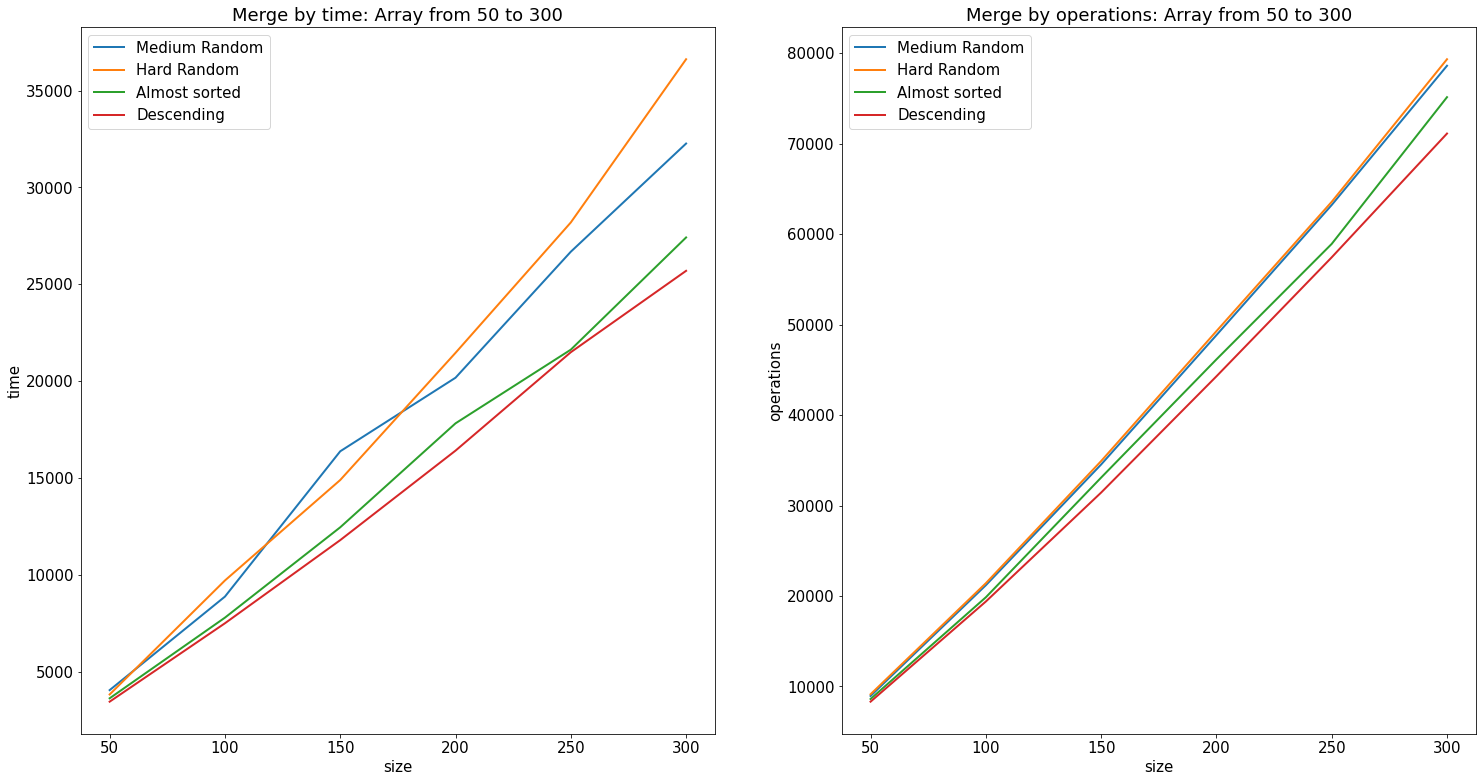

In [259]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

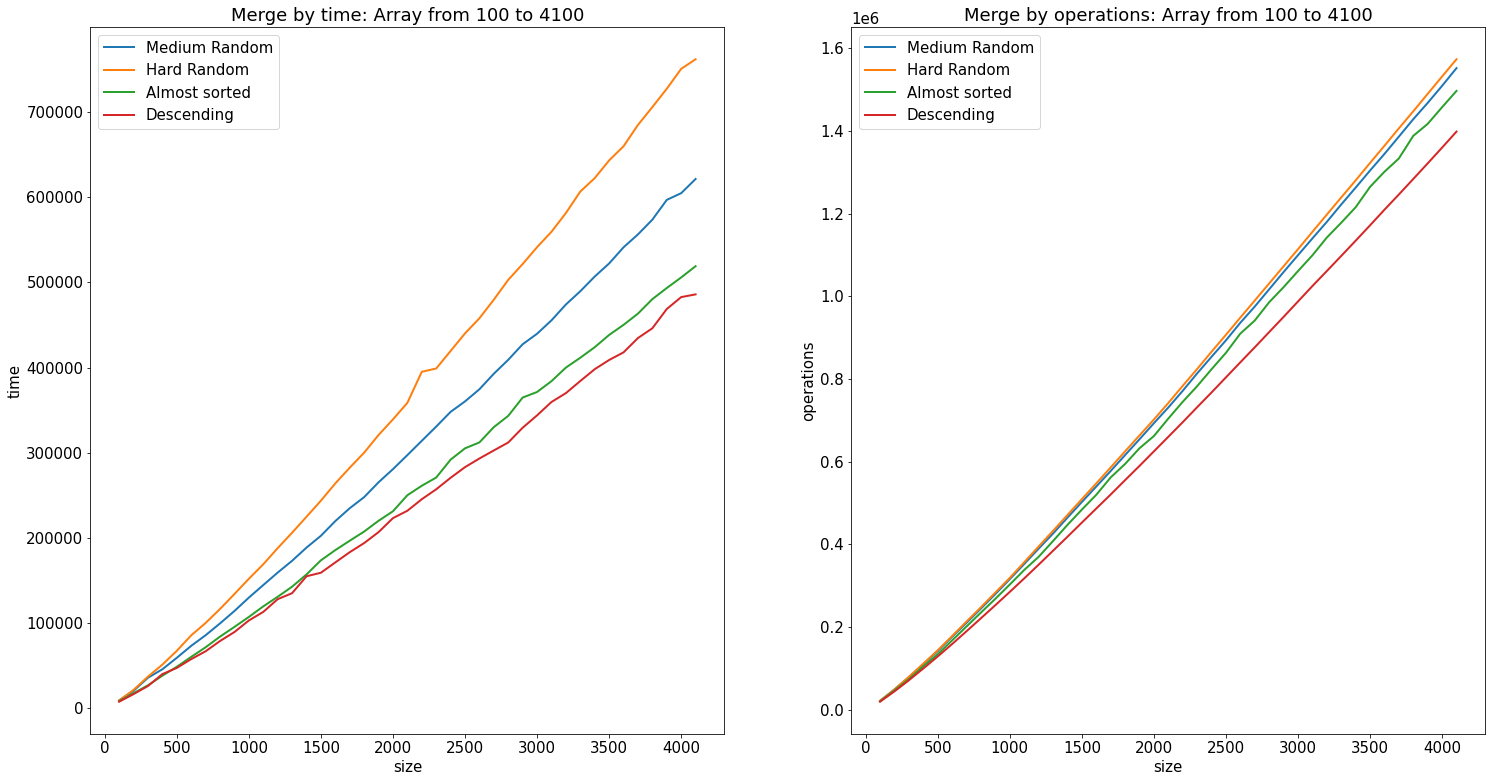

In [260]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика Merge Sort: <br>
Сложность на всех данных O($n*log(n)$) <br>
Лучшие входные данные: Обратно отсортированный массив и почти отсортированный массив (разница минимальна) <br>
Худшие входные данные: Полностью случаный массив с большими значениями <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки  <br>
Серьёзных выбросов по времени не было выявлено

Radix



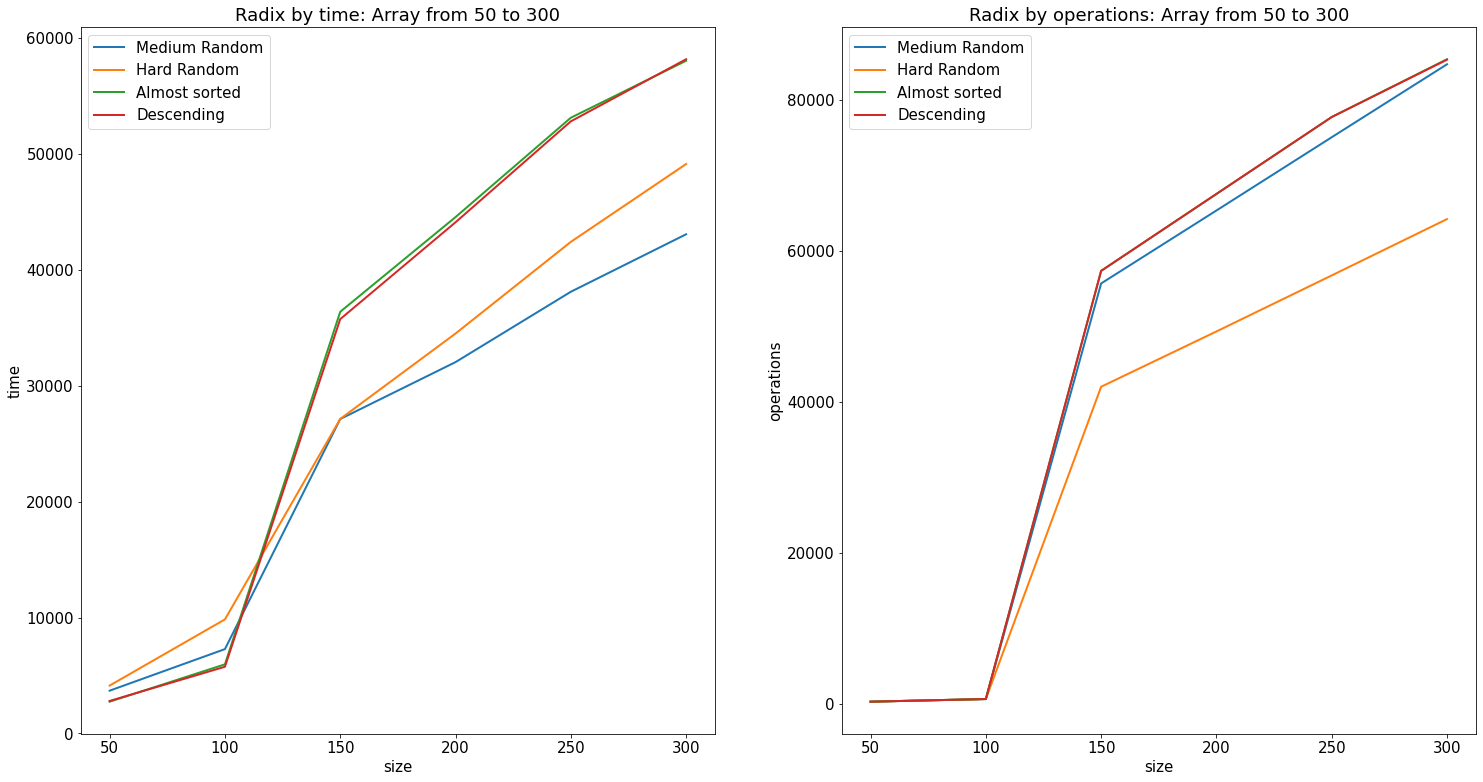

In [261]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

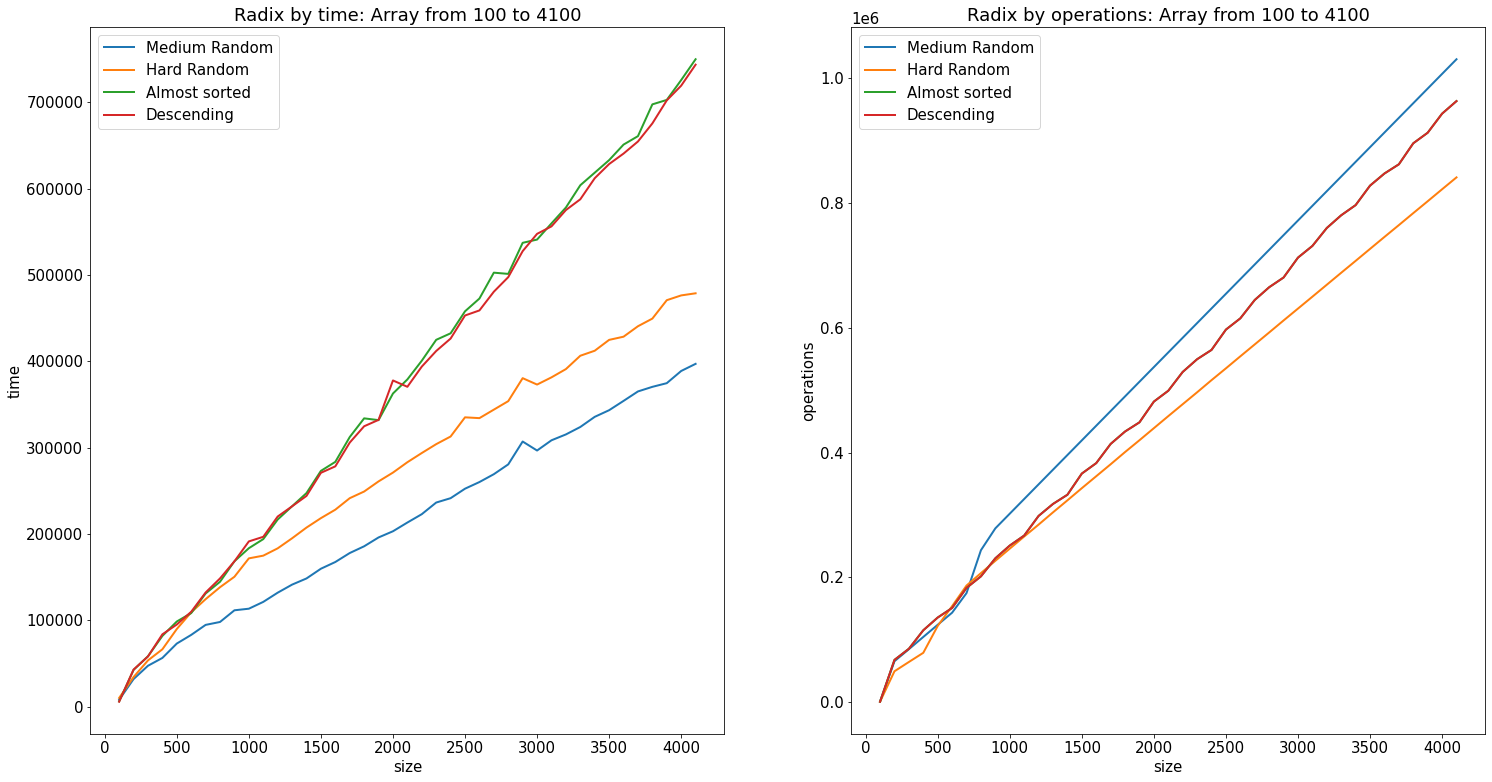

In [262]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика MSD Radix Sort: <br>
Сложность на всех данных O($n*k$) <br>
Лучшие входные данные: Полностью случаный массив с маленькими значениями <br>
Худшие входные данные: Обратно отсортированный массив и почти отсортированный массив (разница минимальна) <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки  <br>
Обнаружено довольно много отклонений при работе со всеми массивами при size от 300 до 4000, хотя количество операций росло практически стабильно <br>
Можно заметить, что данные разделились на две категории "Случайно созданные массивы" и "Медленно (++i) возрастающие/убывающие" - это связано с тем, что при случайном создании числа очень сильно вартируются между собой и легко проходят алгоритм без создания лишних бакетов, в то время как возрастающие отличаются слабо и плохо делятся на бакеты.

Shell



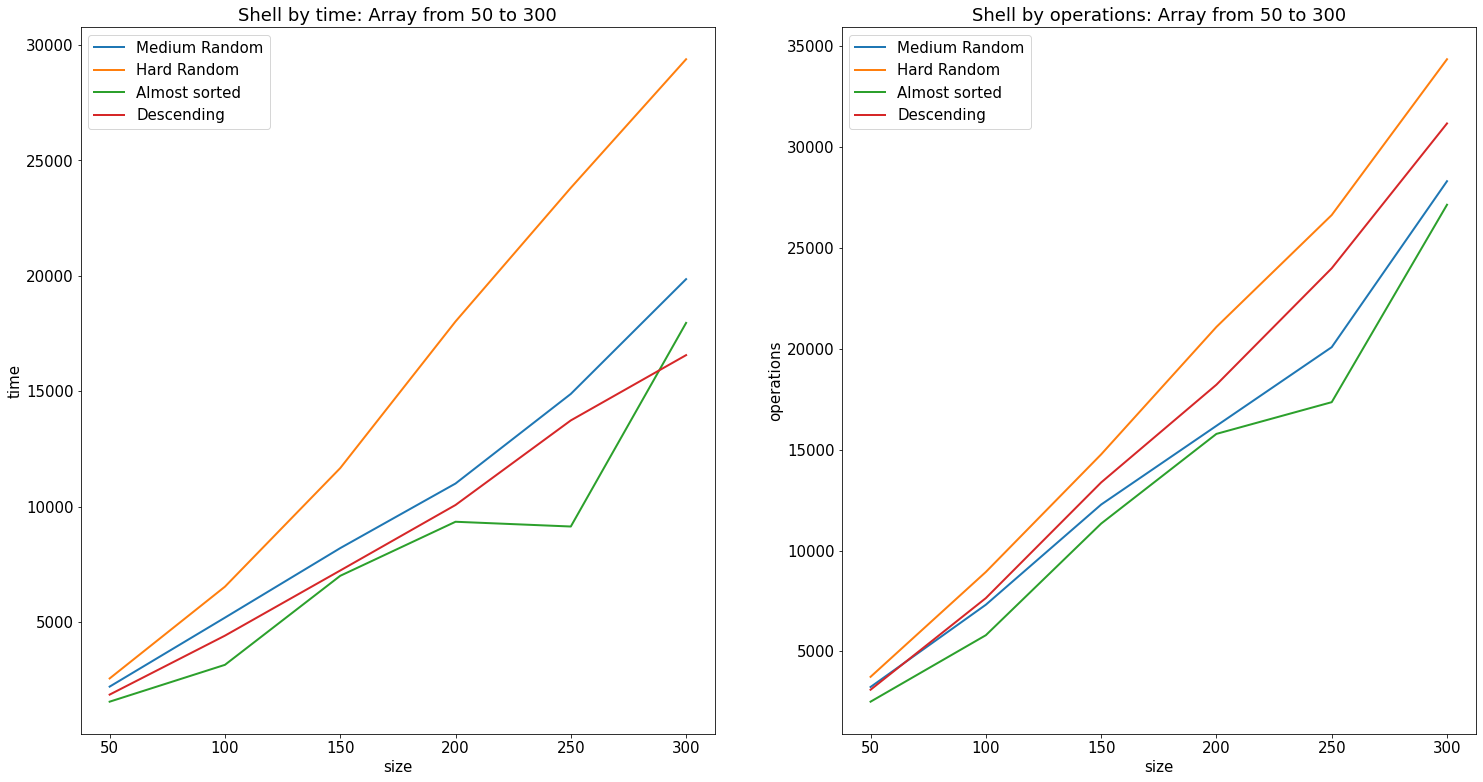

In [263]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

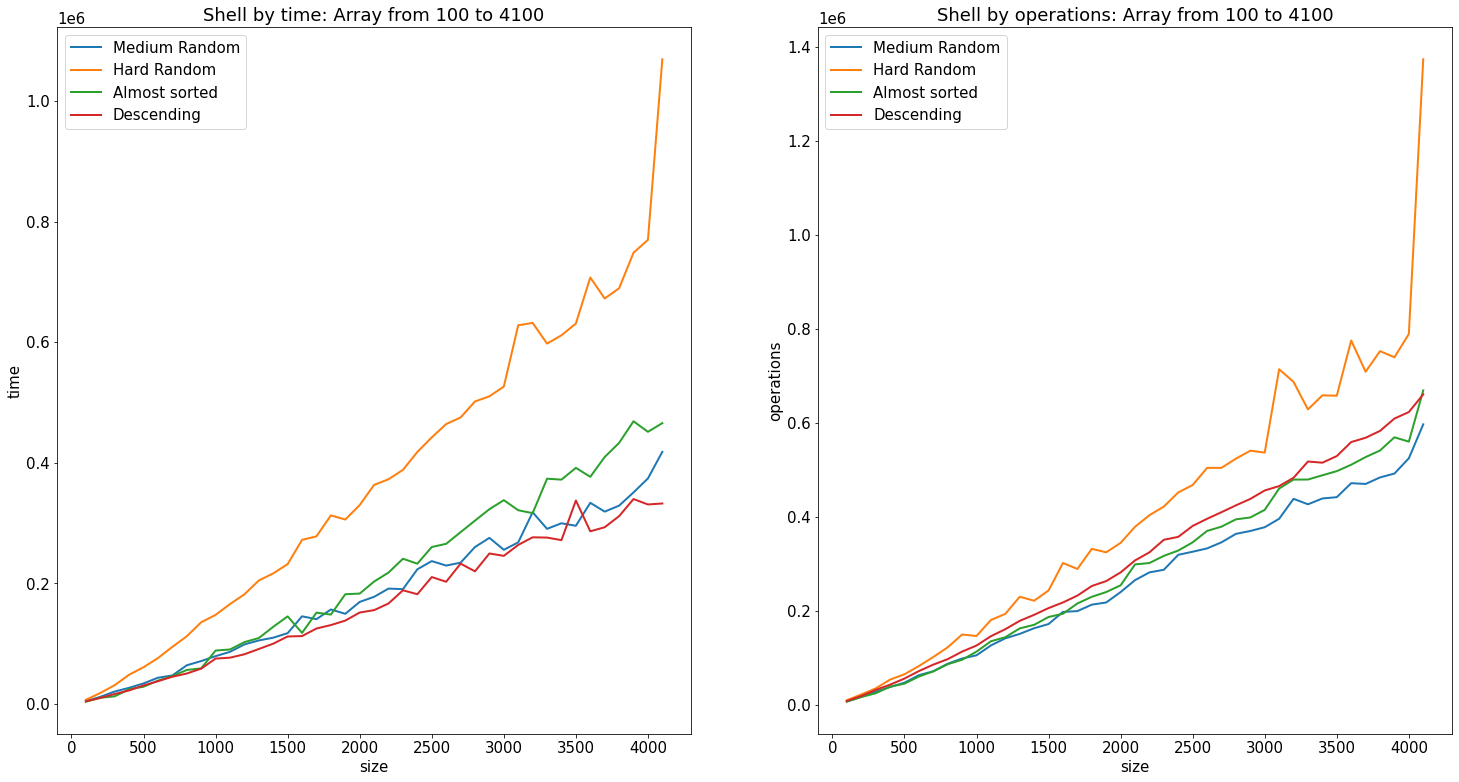

In [264]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика Shell Sort (обычный): <br>
Сложность в худшем случае O($n*log(n)^2$) <br>
Сложность в лучшем случае O($n*log(n)$) <br>
Лучшие входные данные: Тяжело выявить <br>
Худшие входные данные: Полностью случаный массив с большими значениями <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки  <br>
Обнаружено довольно много отклонений и выбросов при работе со всеми массивами при size от 1500 до 4000 (серьёзный выброс на 4000) <br>

ShellCiur



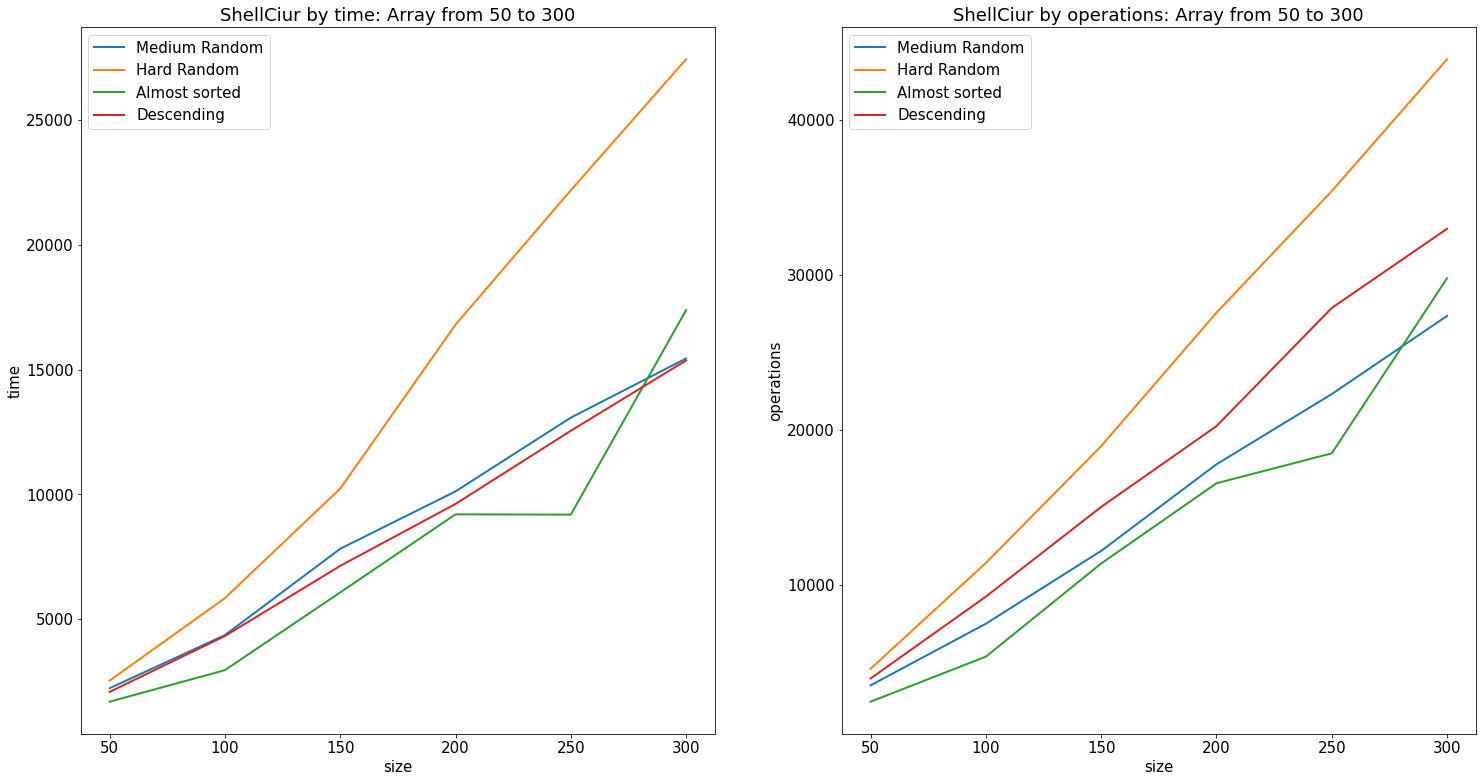

In [265]:
print(arrayNamesFast[i] + '\n')
plotSoloFastSortTests('50', '300', i)

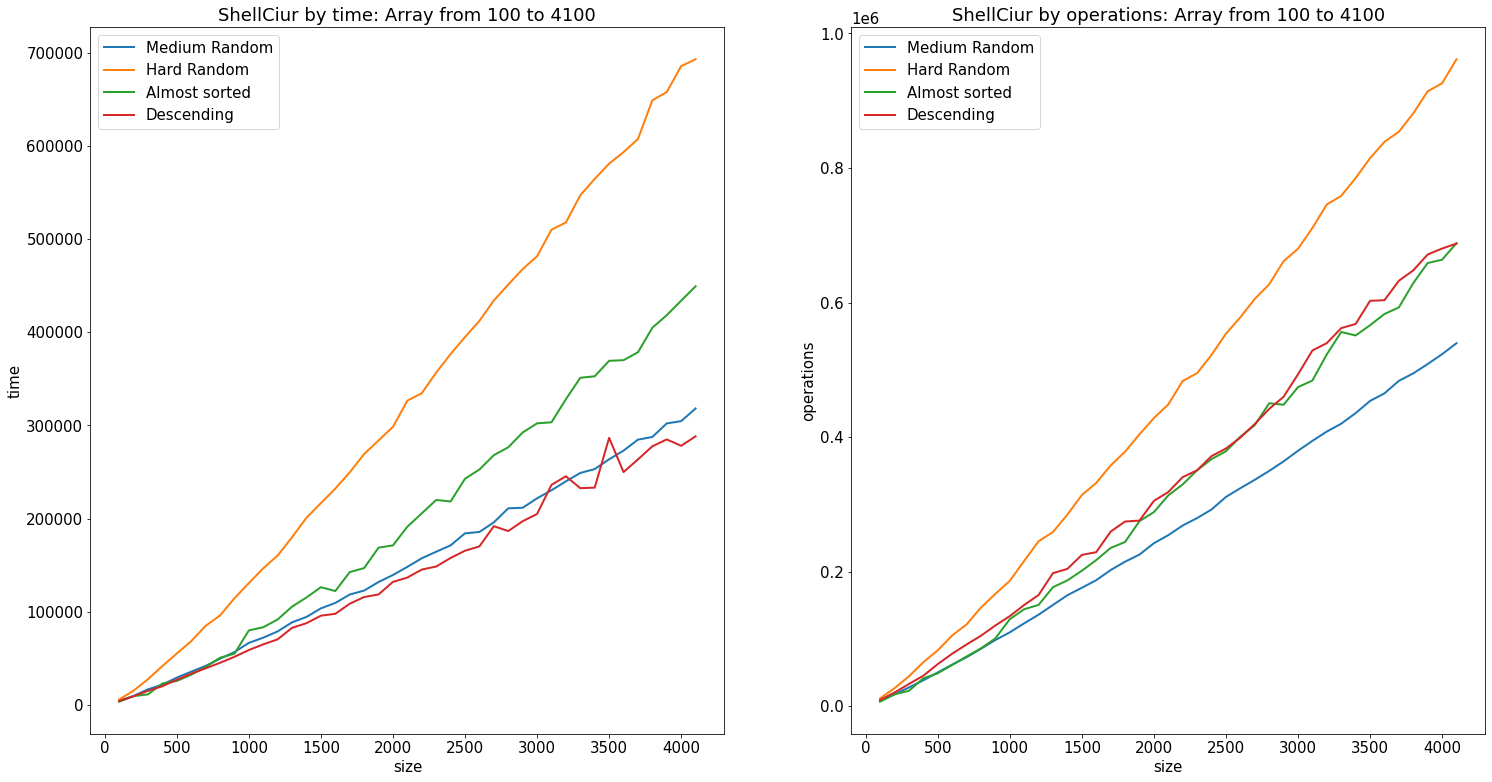

In [266]:
plotSoloFastSortTests('100', '4100', i)
i += 1

#### Анализ графика Shell Sort (последовательноть Циура): <br>
Сложность в худшем случае O($n*log(n)^2$) <br>
Сложность в лучшем случае близка к O($n*log(n)$) <br>
Лучшие входные данные: Обратно отсортированный массив <br>
Худшие входные данные: Полностью случаный массив с большими значениями <br>
Количества проделанных элементарных операций полностью отражают время выполнения сортировки  <br>
Обнаружено немного отклонений при работе со всеми массивами при size от 2500 до 3500 (заметный выброс на 3500), хотя количество операций росло практически стабильно <br>